In [1]:
### ValDXer testing
import os
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter


settings = Settings()
settings.replicates = 3
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

# VDX = ValDXer(settings)
import cProfile
import pstats

/home/alexi/Documents/ValDX


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import subprocess
# from ValDX.helpful_funcs import conda_to_env_dict

# # Assuming settings.HDXer_env contains the name of your Conda environment
# env_path = conda_to_env_dict(settings.HDXer_env)

# command = "echo $HDXER_PATH"
# print("command:", command)

# # Run the command in the subprocess
# output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# # Capture and print the standard output (stdout)
# hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
# print("HDXER_PATH:", hdxer_path)


In [3]:
def pre_process_main_BPTI():
    # BPTI data
    expt_name = 'Experimental'
    test_name = "MD_Simulated"

    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"
    expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

    os.listdir(expt_dir)

    segs_name = "BPTI_residue_segs.txt"
    segs_path = os.path.join(expt_dir, segs_name)

    hdx_name = "BPTI_expt_dfracs.dat"
    hdx_path = os.path.join(expt_dir, hdx_name)
    print(hdx_path)

    rates_name = "BPTI_Intrinsic_rates.dat"
    rates_path = os.path.join(expt_dir, rates_name)
    sim_name = 'BPTI_MD'

    sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

    os.listdir(sim_dir)

    md_reps = 1
    rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

    top_name = "bpti_5pti_eq6_protonly.gro"

    top_path = os.path.join(sim_dir, rep_dirs[0], top_name)
    top_path = "/home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5PTI_chain_A.pdb"
    traj_name = "bpti_5pti_xtal.xtc"

    traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

    print(top_path)
    print(traj_paths)


    small_traj_name = traj_name.replace(".xtc","_small.xtc")
    small_traj_path = os.path.join(sim_dir, small_traj_name)

    u = mda.Universe(top_path)

    
        
    with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
        for ts in u.trajectory:
                W.write(u.atoms)
                W.write(u.atoms)


    traj_paths = [small_traj_path]
    

    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [4]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main_BPTI()

/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
/home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5PTI_chain_A.pdb
['/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_xtal.xtc']


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/XTC.py:105: UserWarning: Reader has no dt information, set to 1.0 ps
  time = ts.time


In [5]:
# def run_split_test(split_mode, name, system):

#     # settings.split_mode = 'R'
#     settings.split_mode = split_mode
#     settings.name = "_".join([name, split_mode, system])

#     VDX = ValDXer(settings)

#     VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
#     VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

#     VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

#     run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
#     analysis_dump, df, name = VDX.dump_analysis()
#     save_path = VDX.save_experiment()

#     return run_outputs, analysis_dump, df, name, save_path

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name naiverandom_r_BPTITtut already exists. At

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_1/reweighting_gamma_4x10^0



Contacts readContacts read
Hbonds read

Hbonds read
Contacts readSegments and experimental dfracs read

Hbonds readSegments and experimental dfracs read

Contacts read
Hbonds read
Segments and experimental dfracs readSegments and experimental dfracs read

Finished reweighting
[(array([0.5, 0.5]), 0.2774769773542249, 0.6505405489628975), (array([0.5, 0.5]), 0.2774769773542249, 0.6505405489628975), (array([0.5, 0.5]), 0.2774769773542249, 0.6505405489628975), (array([0.5, 0.5]), 0.2774769773542249, 0.6505405489628975)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/da

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_1
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

Randomly splitting segments for MD_Simulated with random seed 43 and train fraction 0.5
train_segs
    ResStr  ResEnd  peptide             calc_name
14      23      24       14  train_MD_Simulated_2
5       13      14        5  train_MD_Simulated_2
20      30      31       20  train_MD_Simulated_2
26      36      37       26  train_MD_Simulated_2
6       15      16        6  train_MD_Simulated_2
Saved train MD_Simulated_2 segments to /home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_2/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 5  6  7  8  9 10 12 13 14 19 20 22 24 26 29 31 36 37 38 40]
Saved val MD_Simulated_2 segments to /home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/val_MD_Simulated_2/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 0  1  2  3  4 11 15 16 17 18 21 23 25 27 28 30 32 33 34 35 39]
train_HDX_data
      0.167      1.0     10.0    120.0  peptide             calc_name  \
0   0.00039  0.00232  0.02300  0.243

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_2/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_2/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.2897742986095097, 2.1973775466663437), (array([0.5, 0.5]), 0.2897742986095097, 2.1973775466663437), (array([0.5, 0.5]), 0.2897742986095097, 2.1973775466663437), (array([0.5, 0.5]), 0.2897742986095097, 2.1973775466663437)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/da

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_2
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

train_HDX_data
      0.167      1.0     10.0    120.0  peptide             calc_name  \
0   0.99928  1.00000  1.00000  1.00000       33  train_MD_Simulated_3   
1   0.82092  0.99997  1.00000  1.00000        5  train_MD_Simulated_3   
2   0.00000  0.00000  0.00003  0.00037       11  train_MD_Simulated_3   
3   1.00000  1.00000  1.00000  1.00000       15  train_MD_Simulated_3   
4   0.00963  0.05627  0.43963  0.99904       36  train_MD_Simulated_3   
5   0.00000  0.00000  0.00003  0.00037       12  train_MD_Simulated_3   
6   0.43718  0.96800  1.00000  1.00000       16  train_MD_Simulated_3   
7   0.16309  0.65565  0.99998  1.00000       28  train_MD_Simulated_3   
8   0.00158  0.00943  0.09044  0.67940       18  train_MD_Simulated_3   
9   1.00000  1.00000  1.00000  1.00000       34  train_MD_Simulated_3   
10  1.00000  1.00000  1.00000  1.00000       27  train_MD_Simulated_3   
11  0.08746  0.42191  0.99583  1.00000       17  train_MD_Simulated_3   
12  0.00314  0.01865  0.17161  0.895

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_3/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_3/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_3/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/naiverandom_r_BPTITtut54/train_MD_Simulated_3/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read



Finished reweighting
[(array([0.5, 0.5]), 0.28641625402746207, 0.48417255449594343), (array([0.5, 0.5]), 0.28641625402746207, 0.48417255449594343), (array([0.5, 0.5]), 0.28641625402746207, 0.48417255449594343), (array([0.5, 0.5]), 0.28641625402746207, 0.48417255449594343)]
RW_do_reweighting is False
Path /home/alexi/Documents/

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_3
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

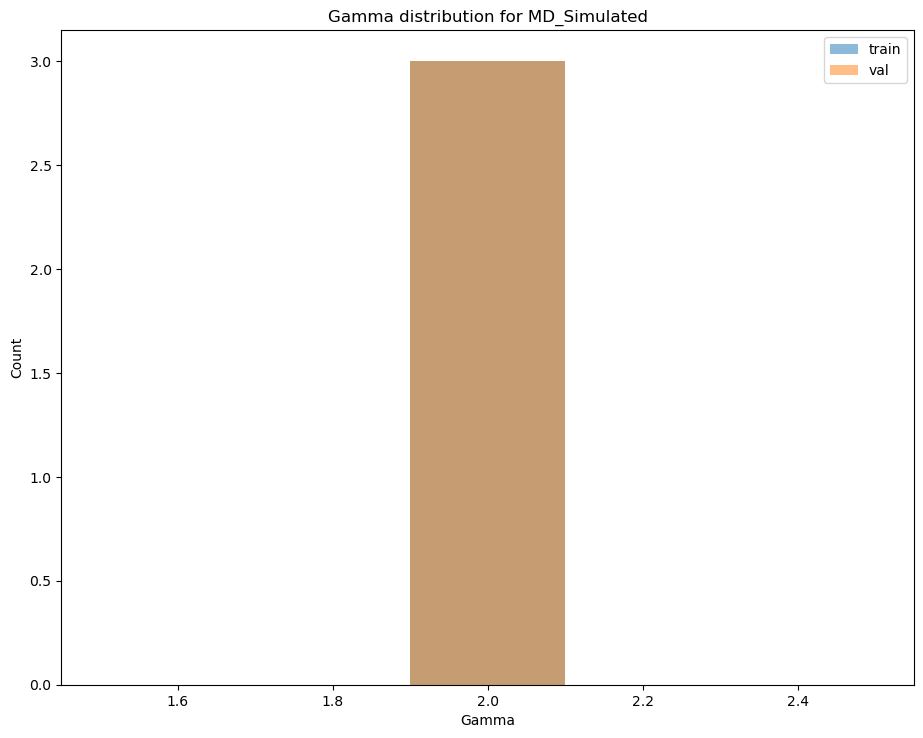

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plotting dfracs compare for train
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
282  0.015653  0.088623  0.532029  0.988481       36  test_MD_Simulated_3   
283  0.437515  0.573150  0.897208  1.000000       37  test_MD_Simulated_3   
284  0.900964  0.999994  1.000000  1.000000       38  test_MD_Simulated_3   
285  0.484796  0.547751  0.816748  0

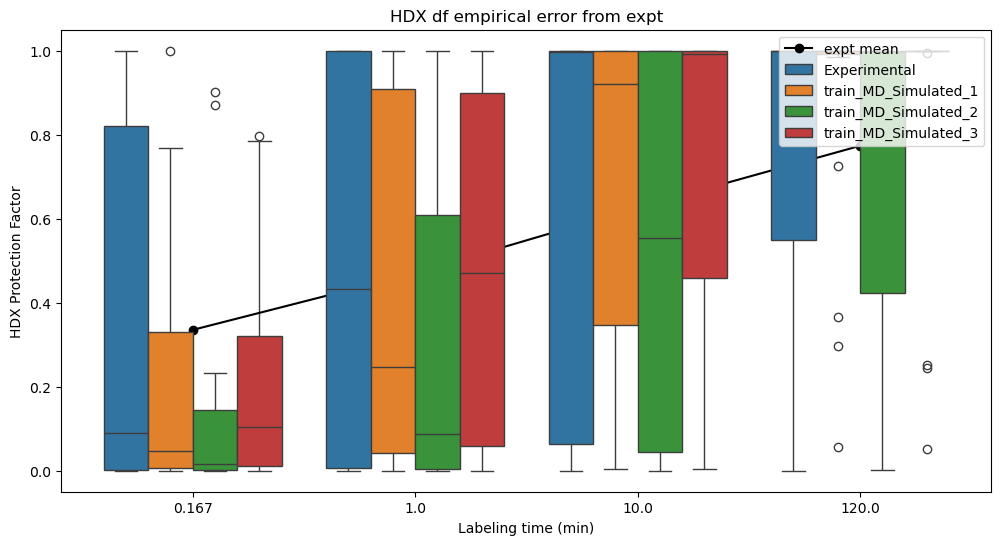

plotting dfracs compare for val
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
282  0.015653  0.088623  0.532029  0.988481       36  test_MD_Simulated_3   
283  0.437515  0.573150  0.897208  1.000000       37  test_MD_Simulated_3   
284  0.900964  0.999994  1.000000  1.000000       38  test_MD_Simulated_3   
285  0.484796  0.547751  0.816748  0.999997       39  test_MD_Simulated_3   
286  0.012307  0.071204  0.507487  0.998429       40  test_MD_Simulated_3   

     ResStr  ResEnd pat

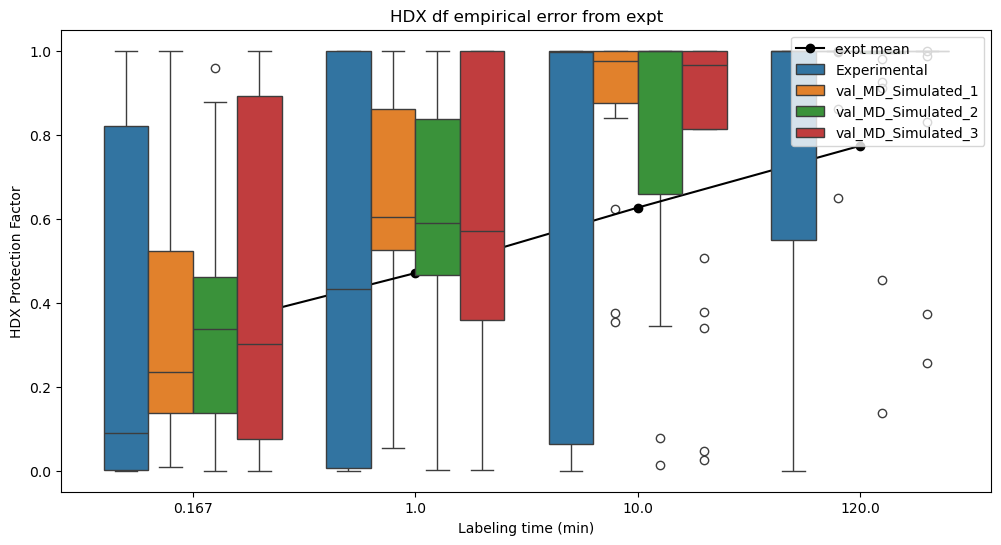

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2', 'test_MD_Simulated_3']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40]
val_rep_peptides [0, 1, 2, 3, 4, 11, 15, 16, 17, 18, 21, 23, 25, 27, 28, 30, 32, 33, 34, 35, 39]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

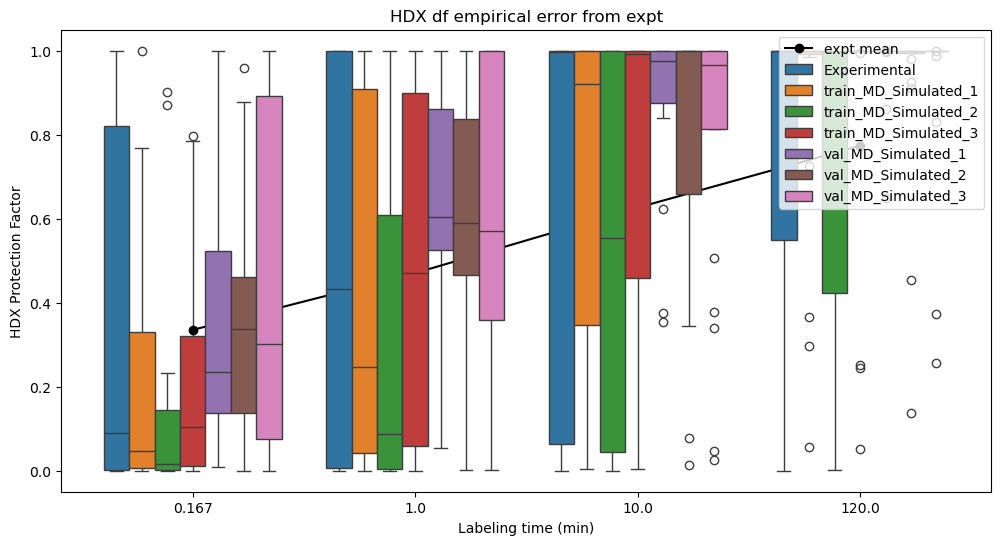

plotting dfracs compare abs for merge_df
plotting paired errors
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
159  0.008148  0.047689  0.377978  0.988313       35  val_MD_Simulated_3   
160  0.437515  0.573150  0.897208  1.000000       37  val_MD_Simulated_3   
161  0.900964  0.999994  1.000000  1.000000       38  val_MD_Simulated_3   
162  0.484796  0.547751  0.816748  0.999997       39  val_MD_Simulated_3   
163  0.012307  0.071204  0.507487  0.998429       40  val_MD_Simulated_3   

     ResStr  ResEnd    

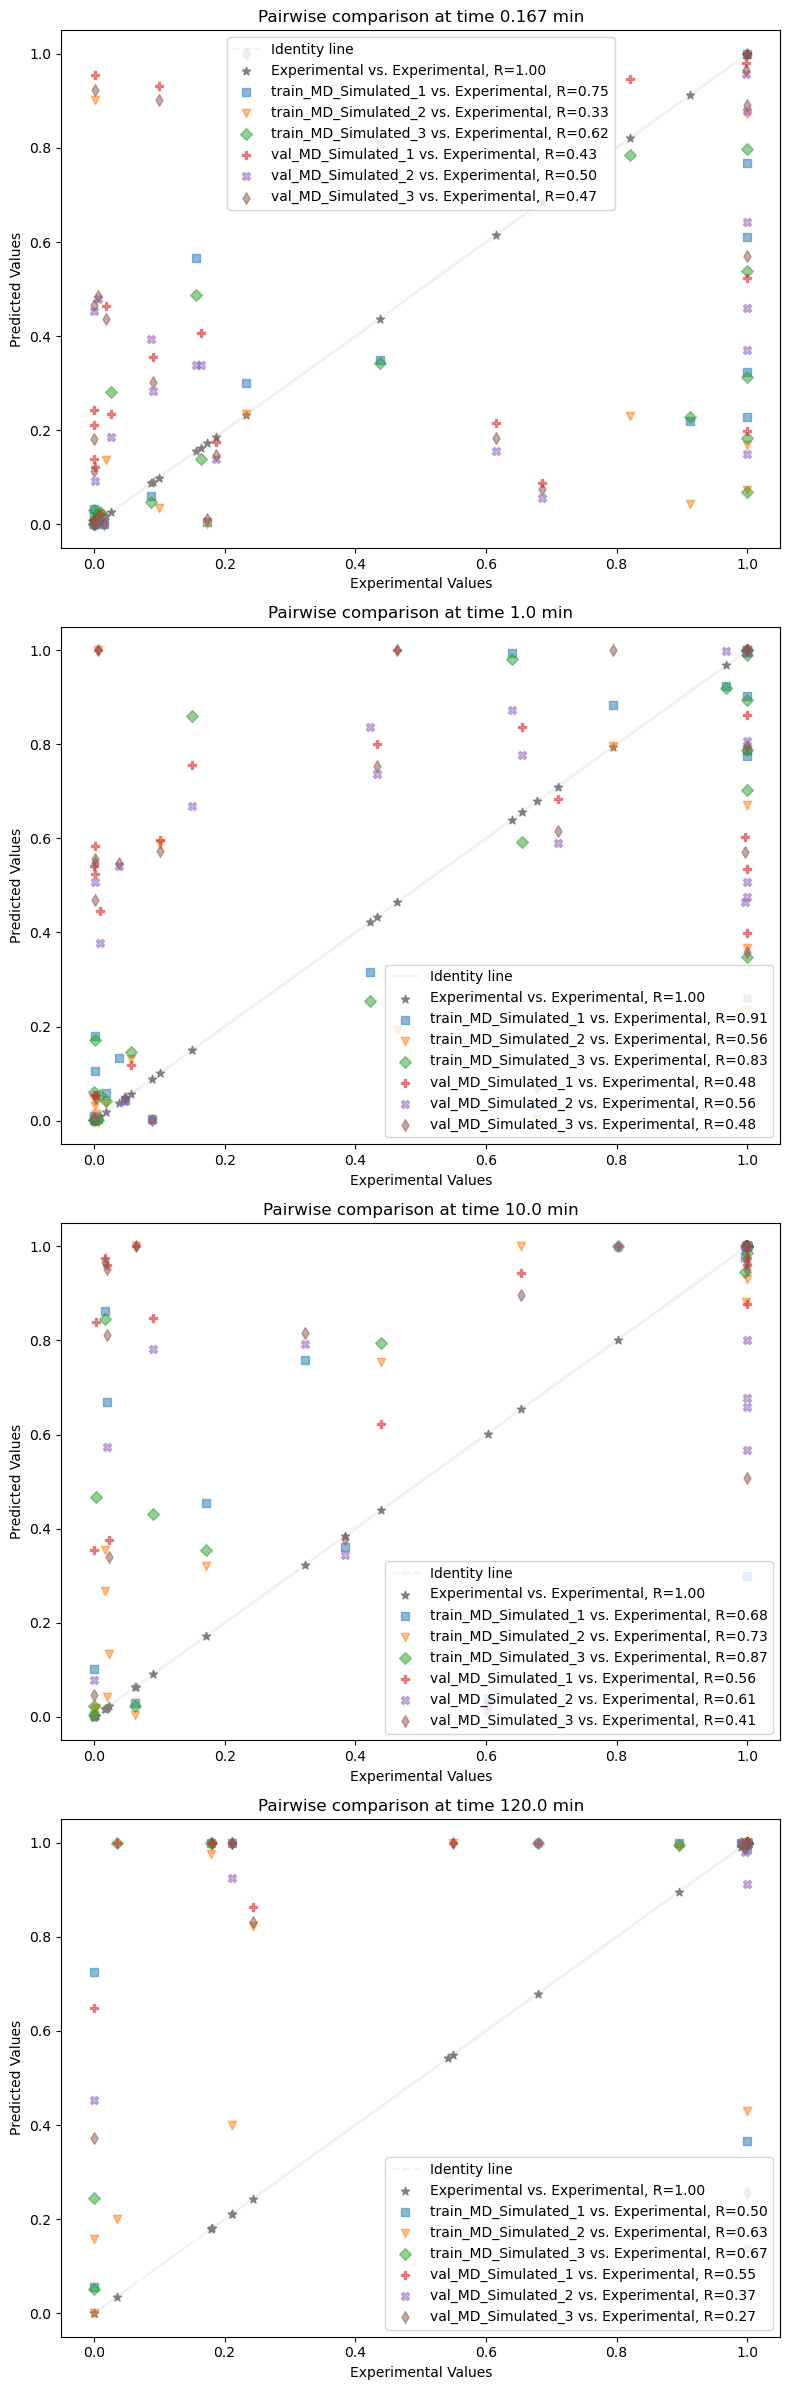

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


plotting R agreement
plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
159  0.008148  0.047689  0.377978  0.988313       35  val_MD_Simulated_3   
160  0.437515  0.573150  0.897208  1.000000       37  val_MD_Simulated_3   
161  0.900964  0.999994  1.000000  1.000000       38  val_MD_Simulated_3   
162  0.484796  0.547751  0.816748  0.999997       39  val_MD_Simulated_3   
163  0.012307  0.071204  0.507487  0.998429       40  val_MD_Simulated_3   

     ResStr  ResEnd            

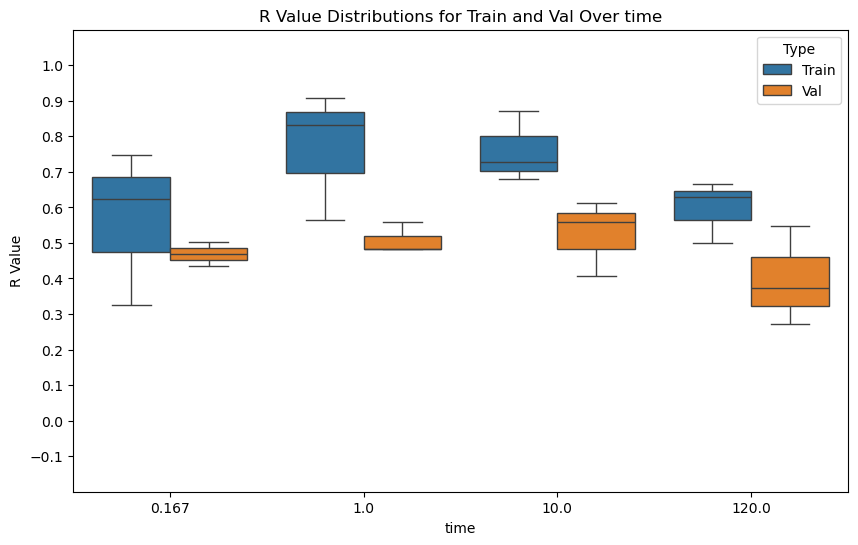

concat plot_df
nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.000490  0.002940  0.029050  0.297940       24  train_MD_Simulated_1   
1    0.001790  0.010680  0.101840  0.724410       13  train_MD_Simulated_1   
2    0.032590  0.179980  0.862520  1.000000        8  train_MD_Simulated_1   
3    0.000630  0.003790  0.037260  0.365990       25  train_MD_Simulated_1   
4    0.767780  0.999840  1.000000  1.000000        4  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
241  0.008148  0.047689  0.377978  0.988313       35    val_MD_Simulated_3   
242  0.437515  0.573150  0.897208  1.000000       37    val_MD_Simulated_3   
243  0.900964  0.999994  1.000000  1.000000       38    val_MD_Simulated_3   
244  0.484796  0.547751  0.816748  0.999997       39    val_MD_Simulated_3   
245  0.012307  0.071204  0.507487  0.998429       40    val_MD_Simulated_3   

     ResStr  ResEnd                      

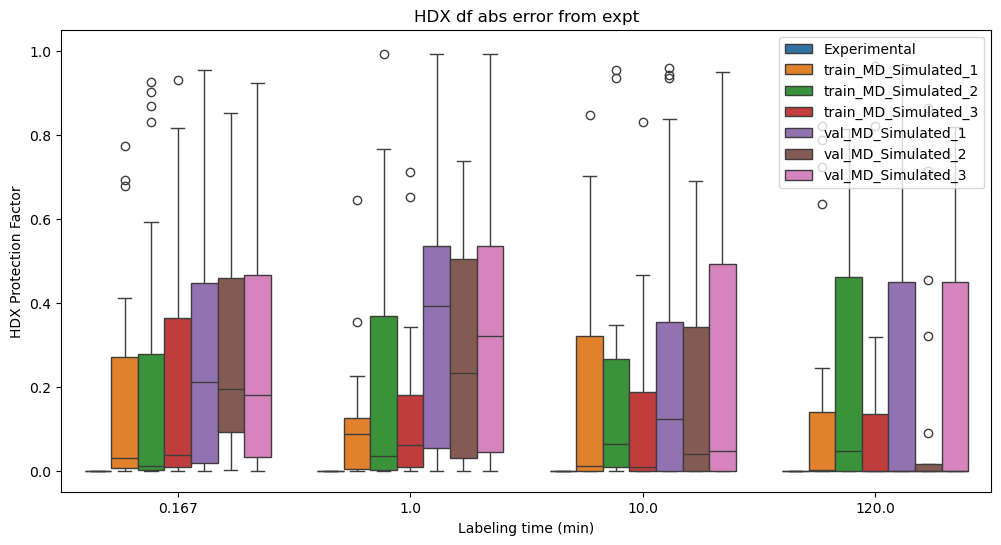

plotting MSE for nan_df
plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00049  0.00294  0.02905  0.29794       24  train_MD_Simulated_1   
1    0.00179  0.01068  0.10184  0.72441       13  train_MD_Simulated_1   
2    0.03259  0.17998  0.86252  1.00000        8  train_MD_Simulated_1   
3    0.00063  0.00379  0.03726  0.36599       25  train_MD_Simulated_1   
4    0.76778  0.99984  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
282  0.00963  0.05627  0.43963  0.99904       36          Experimental   
283  0.01757  0.10068  0.65396  1.00000       37          Experimental   
284  0.09888  0.46390  0.99804  1.00000       38          Experimental   
285  0.00650  0.03831  0.32339  0.99079       39          Experimental   
286  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       N

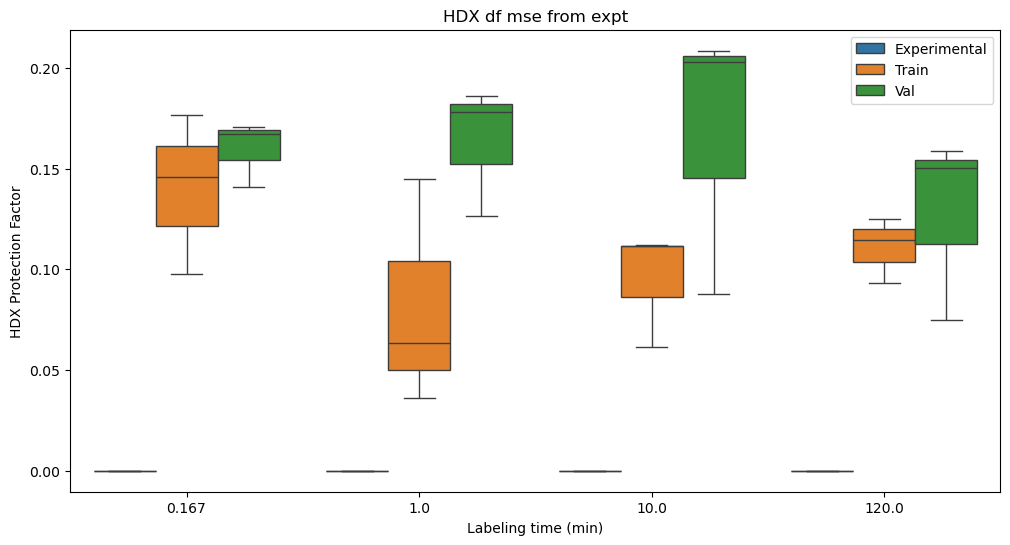

Saving experiment to:  logs/naiverandom_r_BPTITtut54_1708887603.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name NC_Termini_s_BPTITtut already exists. Att

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_1/reweighting_gamma_4x10^0


Contacts readContacts read
Hbonds read

Hbonds readContacts read

Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_1/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Finished reweighting
[(array([0.5, 0.5]), 0.2884821656058644, 1.3780346726516854), (array([0.5, 0.5]), 0.2884821656058644, 1.3780346726516854), (array([0.5, 0.5]), 0.2884821656058644, 1.3780346726516854), (array([0.5, 0.5]), 0.2884821656058644, 1.3780346726516854)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_1/reweighting_gamma_2x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(21, 5)
     0.167      1.0     10.0  120.0  peptide
0  0.47052  0.97780  1.00000    1.0        0
1  0.02940  0.16366  0.83257    1.0        1
2  0.27099  0.84933  1.00000    1.0        2
3  0.03782  0.20613  0.90058    1.0        3
4  0.44291  0.96990  1.00000    1.0        4
Structures loaded MD_Simulated: 
MD_Simulated Topology: <Universe with 995 atoms>
MD_Simulated Trajectory: <Universe with 995 atoms>
MD_Simulated Traj: no frames 2
rates: {3: 917.89750993, 4: 481.71945087, 5: 5161.71683323, 6: 961.15665221, 7: 606.44884922, 10: 391

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

Splitting segments for MD_Simulated by N-terminal and C-terminal
train_segs
   ResStr  ResEnd  peptide             calc_name
0       4       5        0  train_MD_Simulated_2
1       5       6        1  train_MD_Simulated_2
2       6       7        2  train_MD_Simulated_2
3       9      10        3  train_MD_Simulated_2
4      11      12        4  train_MD_Simulated_2
Saved train MD_Simulated_2 segments to /home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_2/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Saved val MD_Simulated_2 segments to /home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/val_MD_Simulated_2/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
train_HDX_data
      0.167      1.0     10.0    120.0  peptide             calc_name  \
0   0.15669  0.63957  0.99996  1.00000        0  train_MD_Simulated

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_2/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_2/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read



Finished reweighting
[(array([0.5, 0.5]), 0.2812659178342902, 1.3025717805868653), (array([0.5, 0.5]), 0.2812659178342902, 1.3025717805868653), (array([0.5, 0.5]), 0.2812659178342902, 1.3025717805868653), (array([0.5, 0.5]), 0.2812659178342902, 1.3025717805868653)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/N

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_2
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

Saved train MD_Simulated HDX data to /home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_3/train_MD_Simulated_3_expt_dfracs.dat
    ResStr  ResEnd    0.167      1.0     10.0    120.0  peptide  \
0       31      32  0.61477  0.99669  1.00000  1.00000       21   
1       32      33  0.00033  0.00198  0.01966  0.21197       22   
2       33      34  0.68572  0.99902  1.00000  1.00000       23   
3       34      35  0.00109  0.00649  0.06306  0.54232       24   
4       35      36  0.01528  0.08809  0.60233  0.99998       25   
5       36      37  0.00314  0.01865  0.17161  0.89558       26   
6       37      38  1.00000  1.00000  1.00000  1.00000       27   
7       40      41  0.16309  0.65565  0.99998  1.00000       28   
8       41      42  1.00000  1.00000  1.00000  1.00000       29   
9       42      43  0.99842  1.00000  1.00000  1.00000       30   
10      43      44  0.00111  0.00663  0.06433  0.54975       31   
11      44      45  0.00033  0.00198  0.0196

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_3/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_3/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_3/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/NC_Termini_s_BPTITtut18/train_MD_Simulated_3/reweighting_gamma_5x10^0



Contacts readContacts readContacts read
Contacts read
Hbonds read

Hbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.2884821656058644, 1.3780346726516854), (array([0.5, 0.5]), 0.2884821656058644, 1.3780346726516854), (array([0.5, 0.5]), 0.2884821656058644, 1.3780346726516854), (array([0.5, 0.5]), 0.2884821656058644, 1.3780346726516854)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/N

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_3
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

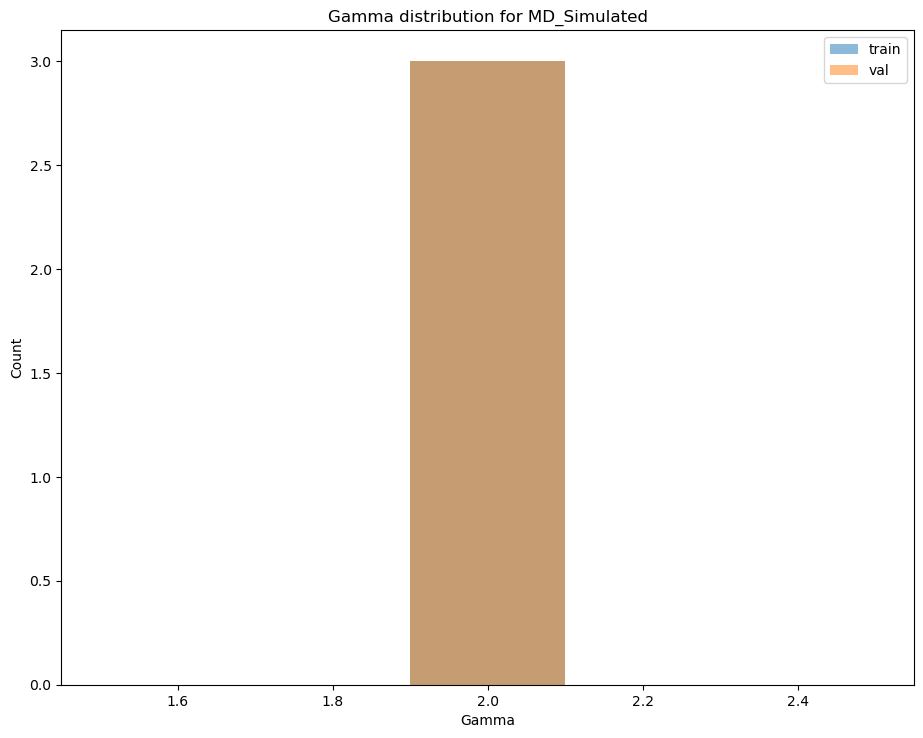

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plotting dfracs compare for train
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
282  0.014548  0.082678  0.510822  0.984466       36  test_MD_Simulated_3   
283  0.431222  0.568411  0.885216  1.000000       37  test_MD_Simulated_3   
284  0.893112  0.999991  1.000000  1.000000       38  test_MD_Simulated_3   
285  0.481700  0.544223  0.801941  0

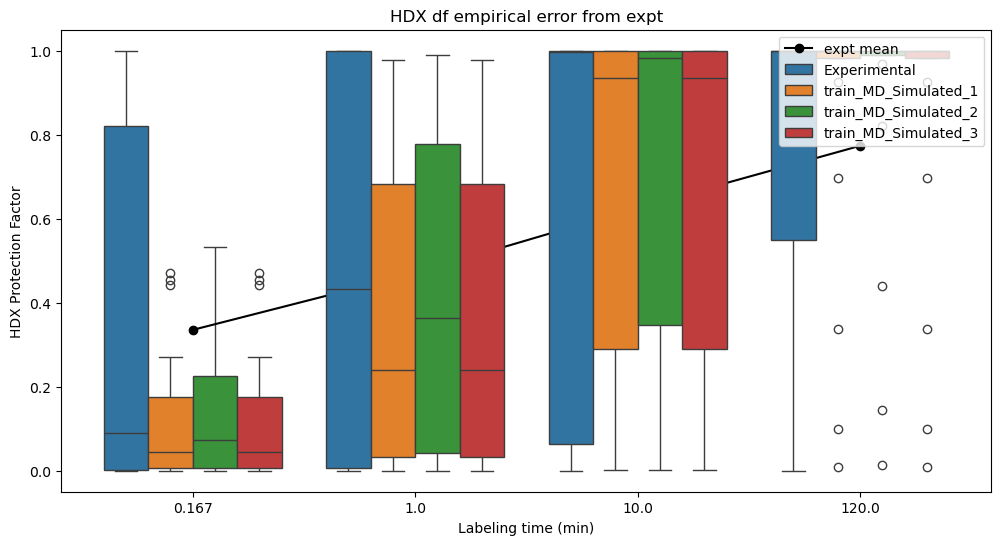

plotting dfracs compare for val
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
282  0.014548  0.082678  0.510822  0.984466       36  test_MD_Simulated_3   
283  0.431222  0.568411  0.885216  1.000000       37  test_MD_Simulated_3   
284  0.893112  0.999991  1.000000  1.000000       38  test_MD_Simulated_3   
285  0.481700  0.544223  0.801941  0.999993       39  test_MD_Simulated_3   
286  0.011360  0.065901  0.480962  0.997543       40  test_MD_Simulated_3   

     ResStr  ResEnd pat

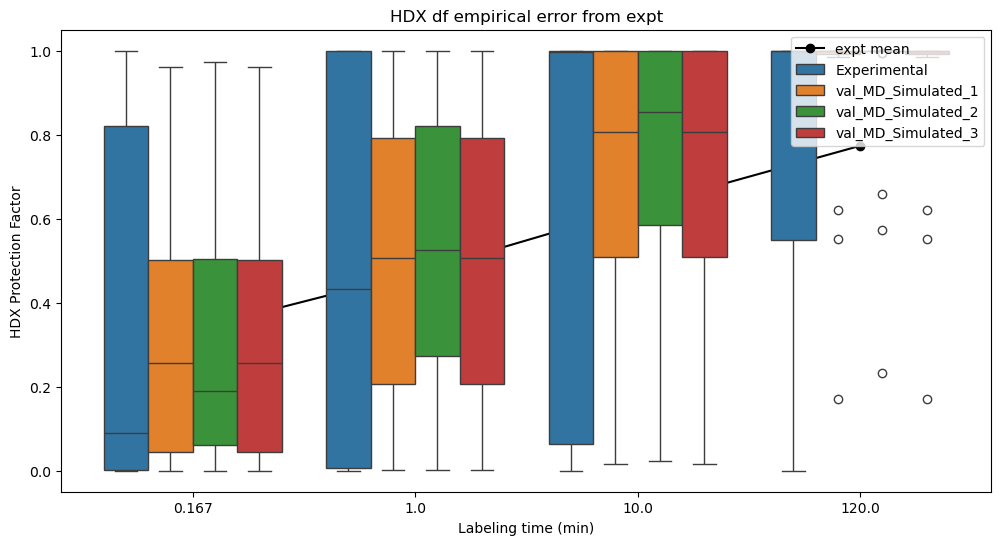

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2', 'test_MD_Simulated_3']
train_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
val_rep_peptides [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
val_rep_peptides [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

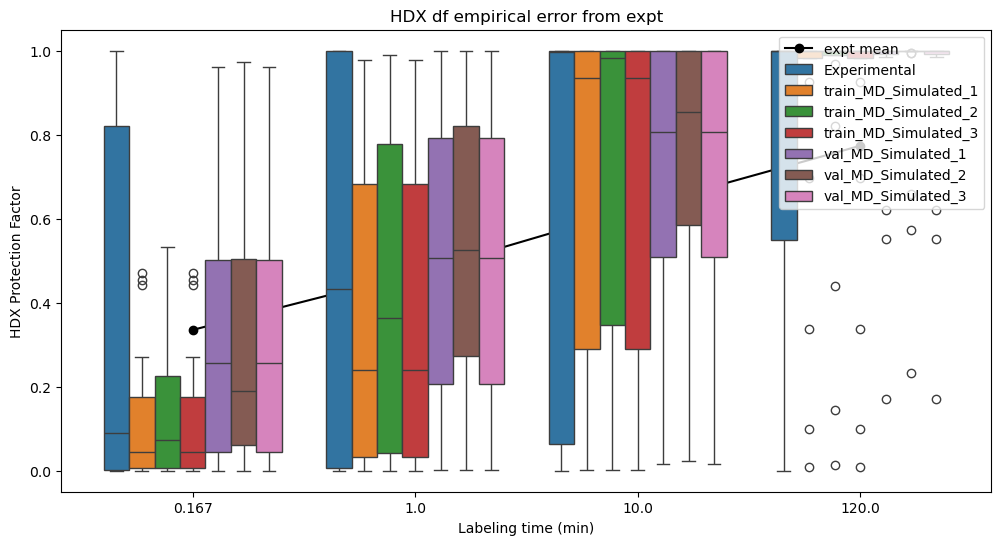

plotting dfracs compare abs for merge_df
plotting paired errors
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
159  0.014548  0.082678  0.510822  0.984466       36  val_MD_Simulated_3   
160  0.431222  0.568411  0.885216  1.000000       37  val_MD_Simulated_3   
161  0.893112  0.999991  1.000000  1.000000       38  val_MD_Simulated_3   
162  0.481700  0.544223  0.801941  0.999993       39  val_MD_Simulated_3   
163  0.011360  0.065901  0.480962  0.997543       40  val_MD_Simulated_3   

     ResStr  ResEnd    

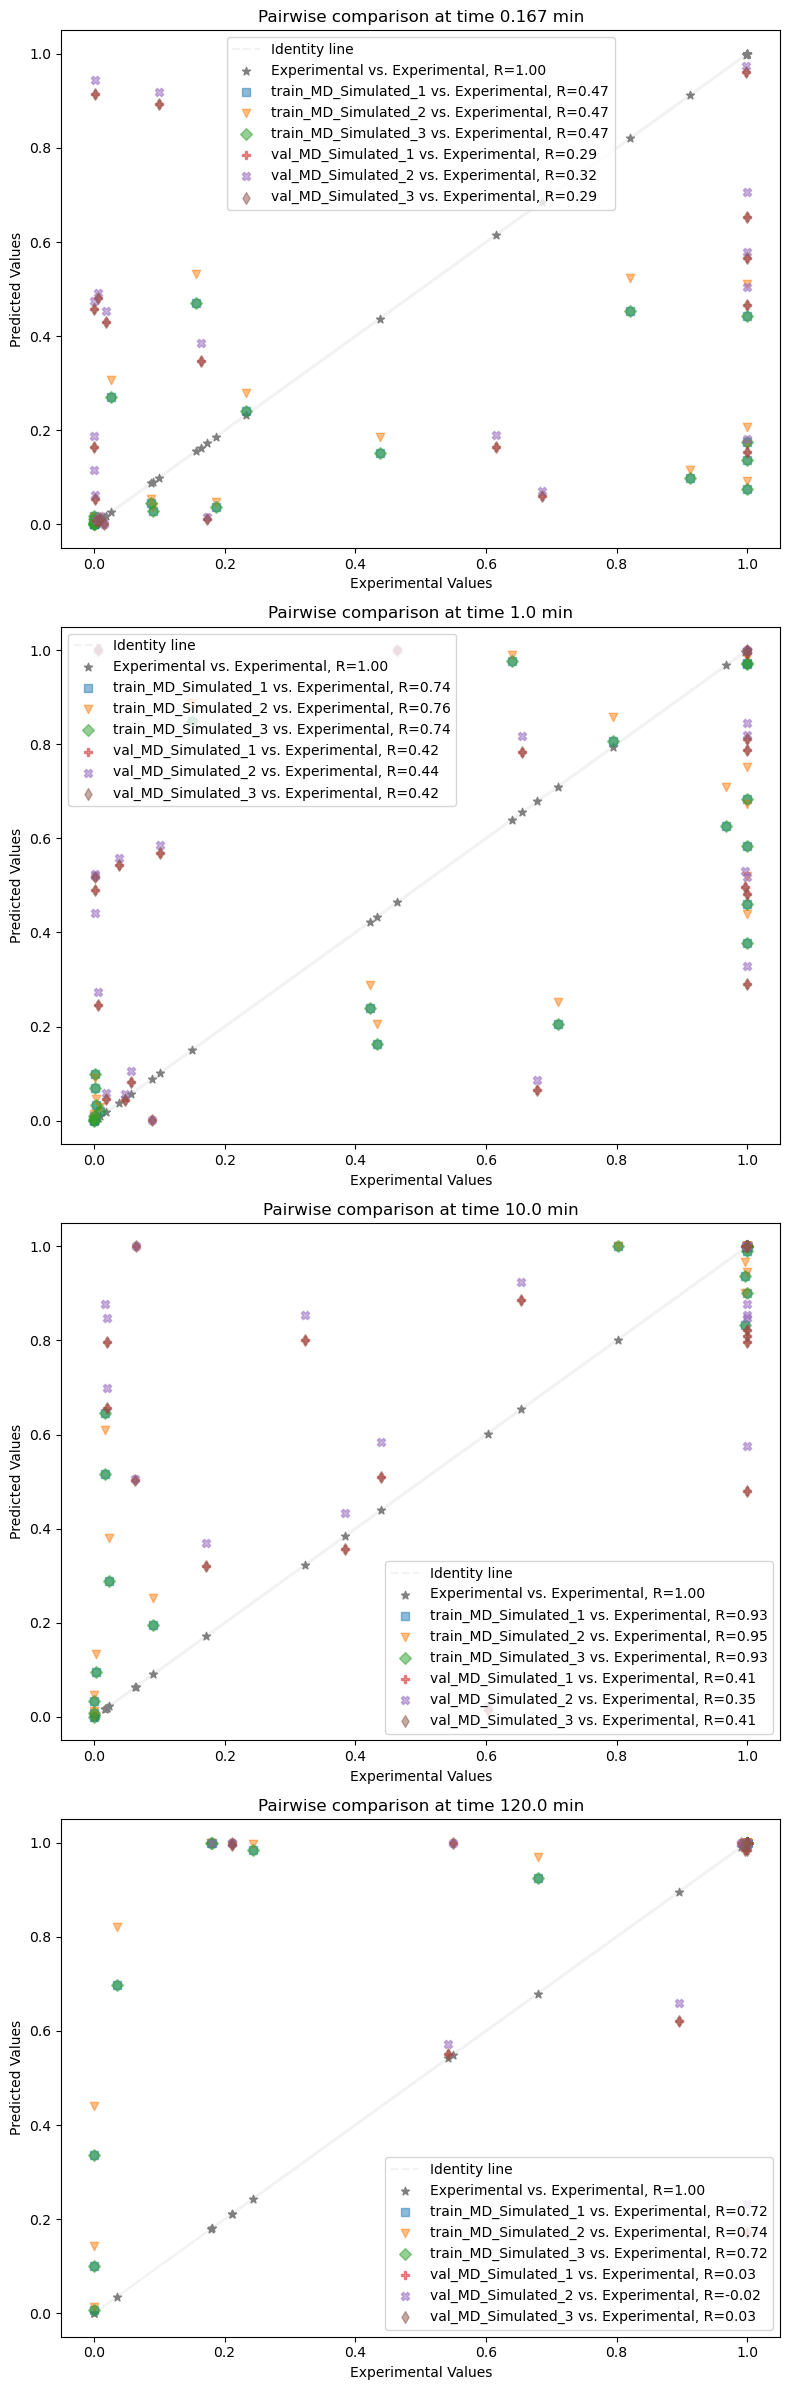

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


plotting R agreement
plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
159  0.014548  0.082678  0.510822  0.984466       36  val_MD_Simulated_3   
160  0.431222  0.568411  0.885216  1.000000       37  val_MD_Simulated_3   
161  0.893112  0.999991  1.000000  1.000000       38  val_MD_Simulated_3   
162  0.481700  0.544223  0.801941  0.999993       39  val_MD_Simulated_3   
163  0.011360  0.065901  0.480962  0.997543       40  val_MD_Simulated_3   

     ResStr  ResEnd            

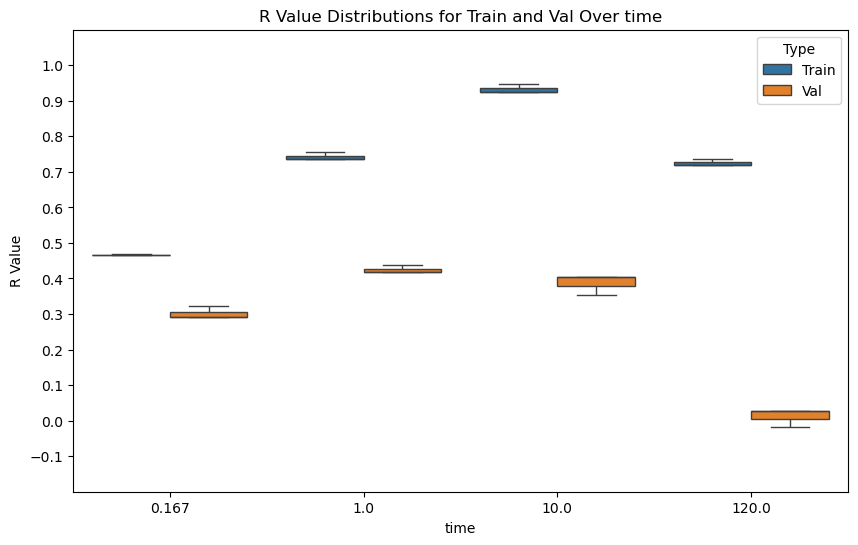

concat plot_df
nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.470520  0.977800  1.000000  1.000000        0  train_MD_Simulated_1   
1    0.029400  0.163660  0.832570  1.000000        1  train_MD_Simulated_1   
2    0.270990  0.849330  1.000000  1.000000        2  train_MD_Simulated_1   
3    0.037820  0.206130  0.900580  1.000000        3  train_MD_Simulated_1   
4    0.442910  0.969900  1.000000  1.000000        4  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
241  0.014548  0.082678  0.510822  0.984466       36    val_MD_Simulated_3   
242  0.431222  0.568411  0.885216  1.000000       37    val_MD_Simulated_3   
243  0.893112  0.999991  1.000000  1.000000       38    val_MD_Simulated_3   
244  0.481700  0.544223  0.801941  0.999993       39    val_MD_Simulated_3   
245  0.011360  0.065901  0.480962  0.997543       40    val_MD_Simulated_3   

     ResStr  ResEnd                      

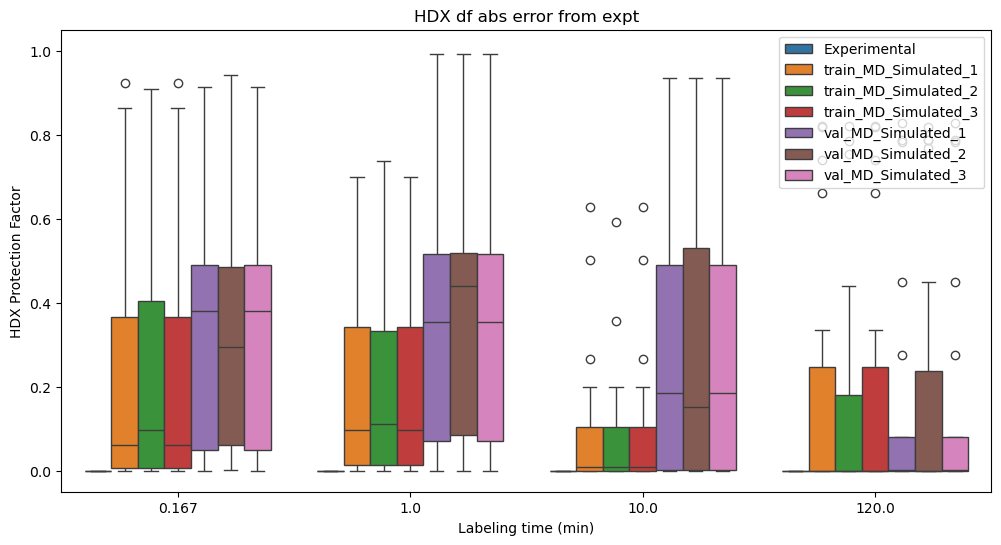

plotting MSE for nan_df
plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.47052  0.97780  1.00000  1.00000        0  train_MD_Simulated_1   
1    0.02940  0.16366  0.83257  1.00000        1  train_MD_Simulated_1   
2    0.27099  0.84933  1.00000  1.00000        2  train_MD_Simulated_1   
3    0.03782  0.20613  0.90058  1.00000        3  train_MD_Simulated_1   
4    0.44291  0.96990  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
282  0.00963  0.05627  0.43963  0.99904       36          Experimental   
283  0.01757  0.10068  0.65396  1.00000       37          Experimental   
284  0.09888  0.46390  0.99804  1.00000       38          Experimental   
285  0.00650  0.03831  0.32339  0.99079       39          Experimental   
286  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       N

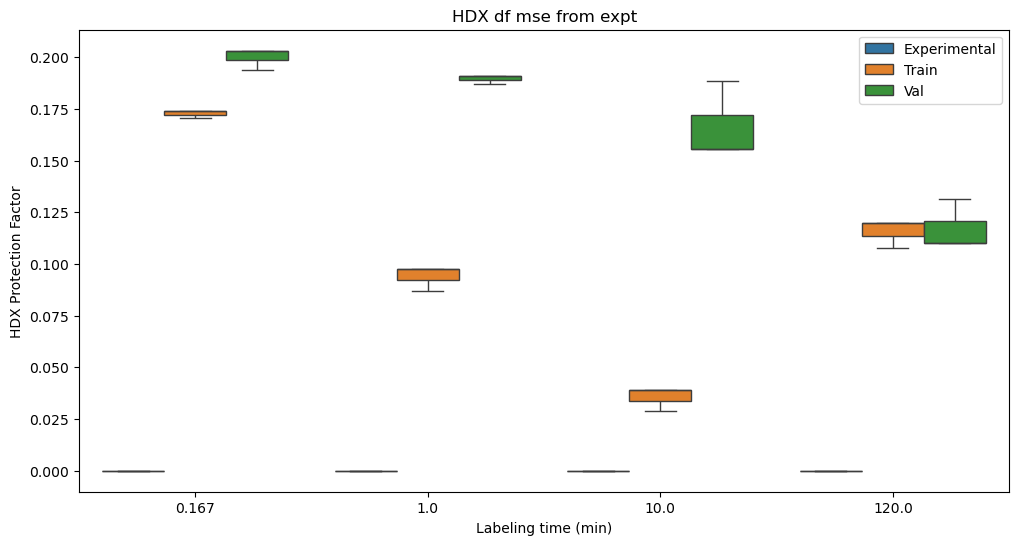

Saving experiment to:  logs/NC_Termini_s_BPTITtut18_1708887622.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name RedundantK_R3_BPTITtut already exists. At

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_1/reweighting_gamma_4x10^0


Contacts read
Contacts readHbonds read

Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_1/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.29198944069035854, 2.0691144458476027), (array([0.5, 0.5]), 0.29198944069035854, 2.0691144458476027), (array([0.5, 0.5]), 0.29198944069035854, 2.0691144458476027), (array([0.5, 0.5]), 0.29198944069035854, 2.0691144458476027)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValD

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_1
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

centrality
1    82
Name: count, dtype: int64
Residue intersection:  []
Intersection peptides:  []
0.0
Train peptides:  [ 0  1  2  3  4  5 16 17 18 19 20 21 22 23 24 25 26 27]
0.43902439024390244
Val peptides:  [ 6  7  8  9 10 11 12 13 14 15 28 29 30 31 32 33 34 35 36 37 38 39 40]
0.5609756097560976
train_segs
   ResStr  ResEnd  peptide             calc_name
0       4       5        0  train_MD_Simulated_2
1       5       6        1  train_MD_Simulated_2
2       6       7        2  train_MD_Simulated_2
3       9      10        3  train_MD_Simulated_2
4      11      12        4  train_MD_Simulated_2
Saved train MD_Simulated_2 segments to /home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_2/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  1  2  3  4  5 16 17 18 19 20 21 22 23 24 25 26 27]
Saved val MD_Simulated_2 segments to /home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/val_MD_Simulated_2/val_residue_segs__MD_Simulated_.txt
Val Peptid

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_2/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_2/reweighting_gamma_4x10^0

Contacts read
Contacts readHbonds read

Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_2/reweighting_gamma_3x10^0

Contacts readContacts read

Hbonds readHbonds read

Segments and experimental dfracs readSegments and experimental dfracs read

Finished reweighting
[(array([0.5, 0.5]), 0.25954504483879626, 1.049182256855258), (array([0.5, 0.5]), 0.25954504483879626, 1.049182256855258), (array([0.5, 0.5]), 0.25954504483879626, 1.049182256855258), (array([0.5, 0.5]), 0.25954504483879626, 1.049182256855258)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/da

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_2
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

Writing val PDB to results/RedundantK_R3_BPTITtut/val_2_RedundantK_R3_BPTITtut_20240225-190034.pdb
Splitting segments for MD_Simulated by redundancy mk III
centrality
1    82
Name: count, dtype: int64
Residue intersection:  [55 56]
Intersection peptides:  [39 40]
0.05
Train peptides:  [ 0  1  2  3  4  5 32 33 34 35 36 37 38]
0.325
Val peptides:  [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30]
0.625
train_segs
   ResStr  ResEnd  peptide             calc_name
0       4       5        0  train_MD_Simulated_3
1       5       6        1  train_MD_Simulated_3
2       6       7        2  train_MD_Simulated_3
3       9      10        3  train_MD_Simulated_3
4      11      12        4  train_MD_Simulated_3
Saved train MD_Simulated_3 segments to /home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_3/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  1  2  3  4  5 32 33 34 35 36 37 38]
Saved val MD_Simulated_3 segments to /home/

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_3/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_3/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_3/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/RedundantK_R3_BPTITtut15/train_MD_Simulated_3/reweighting_gamma_4x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read

Finished reweighting
[(array([0.5, 0.5]), 0.30233470822722663, 1.284797280307727), (array([0.5, 0.5]), 0.30233470822722663, 1.284797280307727), (array([0.5, 0.5]), 0.30233470822722663, 1.284797280307727), (array([0.5, 0.5]), 0.30233470822722663, 1.284797280307727)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/da

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_3
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

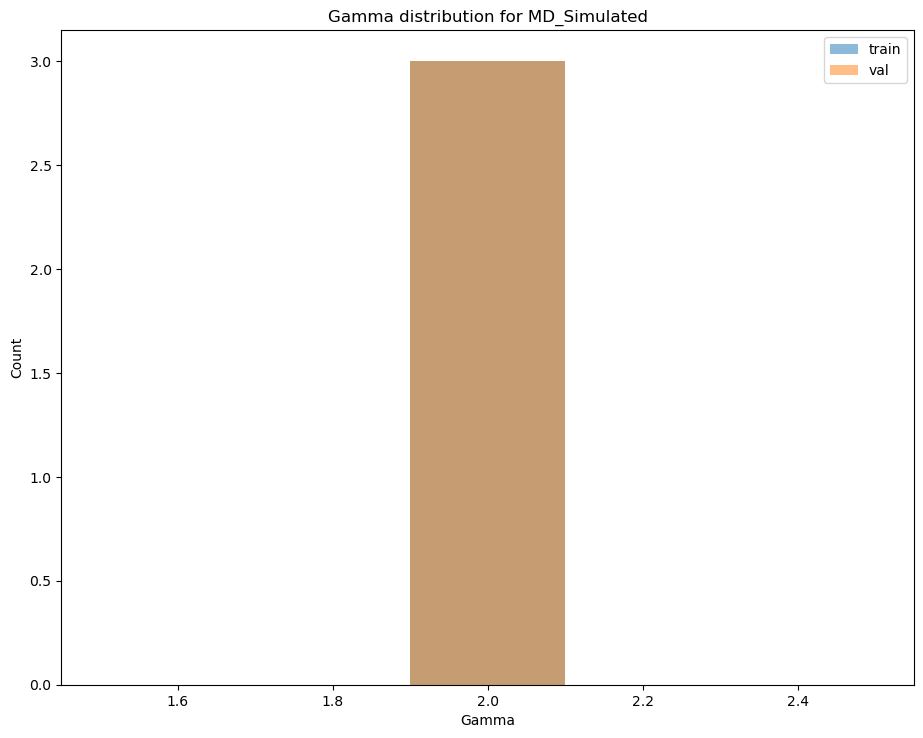

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plotting dfracs compare for train
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
279  0.008896  0.051559  0.374540  0.931965       36  test_MD_Simulated_3   
280  0.386566  0.543215  0.797967  0.999991       37  test_MD_Simulated_3   
281  0.832297  0.999898  1.000000  1.000000       38  test_MD_Simulated_3   
282  0.457725  0.526261  0.708485  0

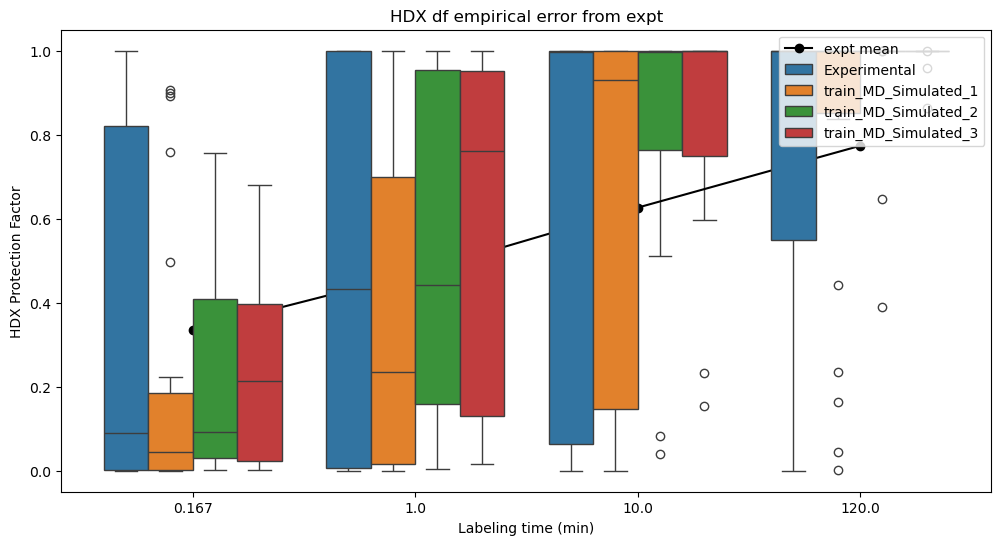

plotting dfracs compare for val
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
279  0.008896  0.051559  0.374540  0.931965       36  test_MD_Simulated_3   
280  0.386566  0.543215  0.797967  0.999991       37  test_MD_Simulated_3   
281  0.832297  0.999898  1.000000  1.000000       38  test_MD_Simulated_3   
282  0.457725  0.526261  0.708485  0.999229       39  test_MD_Simulated_3   
283  0.006636  0.039007  0.322276  0.976676       40  test_MD_Simulated_3   

     ResStr  ResEnd pat

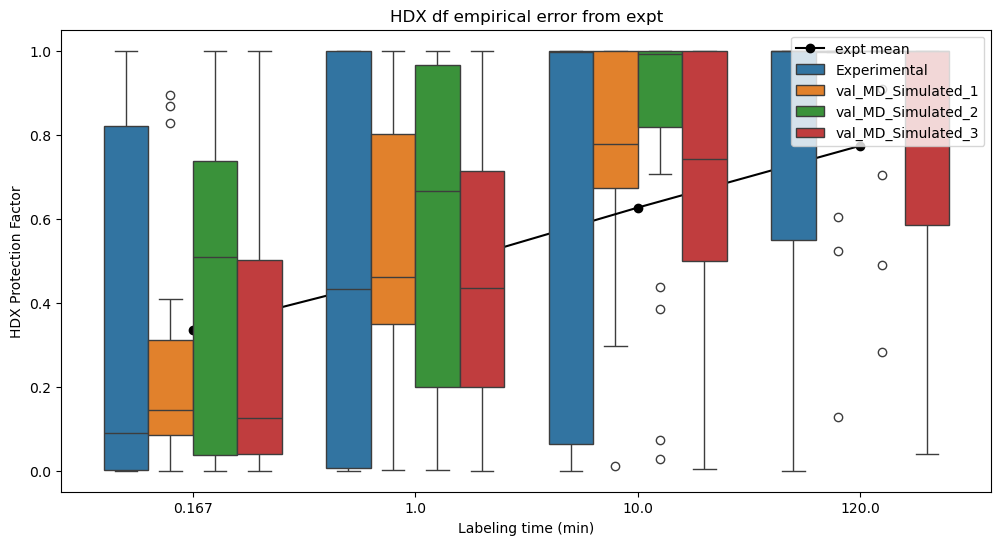

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2', 'test_MD_Simulated_3']
train_rep_peptides [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
val_rep_peptides [0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
val_rep_peptides [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

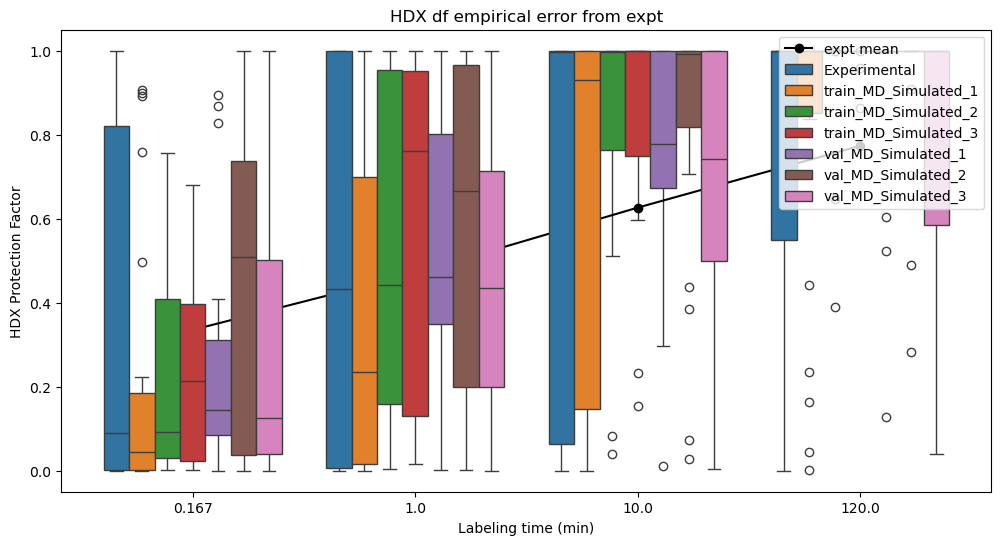

plotting dfracs compare abs for merge_df
plotting paired errors
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
156  0.005090  0.029746  0.231747  0.567219       26  val_MD_Simulated_3   
157  0.109272  0.405923  0.725732  0.999629       27  val_MD_Simulated_3   
158  0.277297  0.713731  0.998796  1.000000       28  val_MD_Simulated_3   
159  0.547890  0.726386  0.998796  1.000000       29  val_MD_Simulated_3   
160  0.925022  0.999994  1.000000  1.000000       30  val_MD_Simulated_3   

     ResStr  ResEnd    

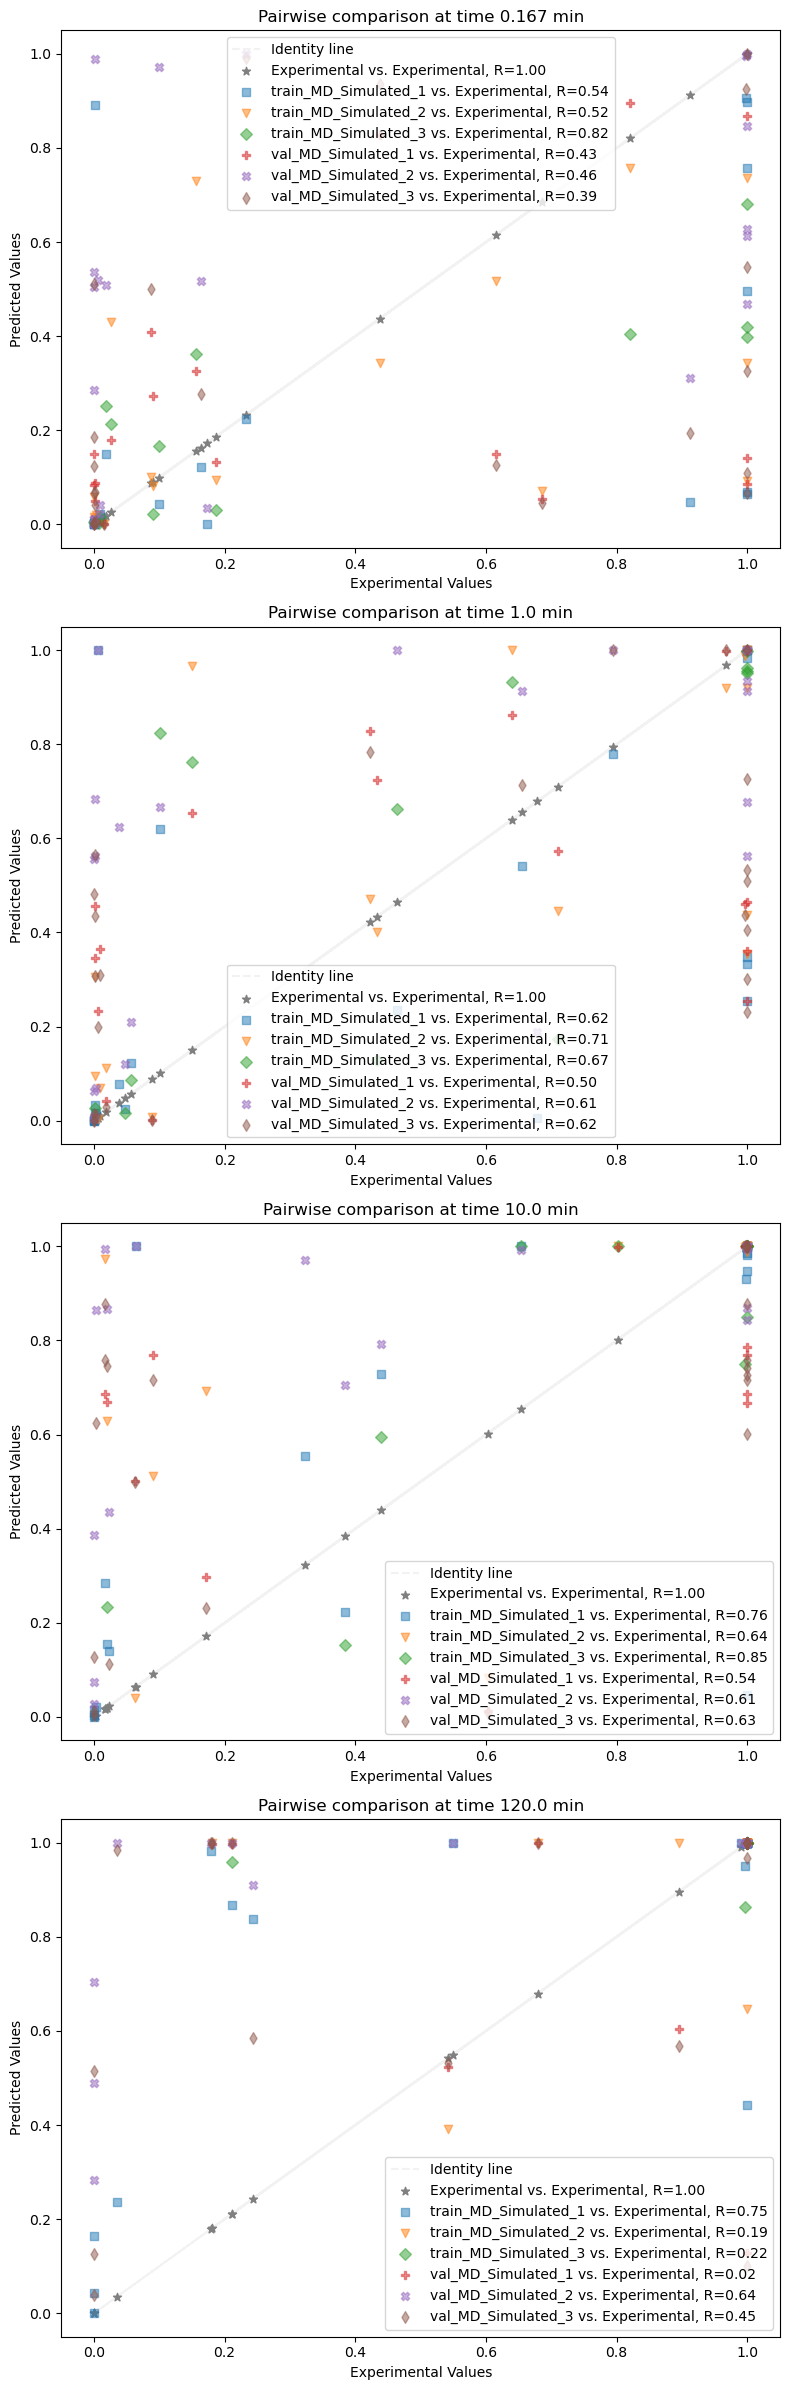

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


plotting R agreement
plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
156  0.005090  0.029746  0.231747  0.567219       26  val_MD_Simulated_3   
157  0.109272  0.405923  0.725732  0.999629       27  val_MD_Simulated_3   
158  0.277297  0.713731  0.998796  1.000000       28  val_MD_Simulated_3   
159  0.547890  0.726386  0.998796  1.000000       29  val_MD_Simulated_3   
160  0.925022  0.999994  1.000000  1.000000       30  val_MD_Simulated_3   

     ResStr  ResEnd            

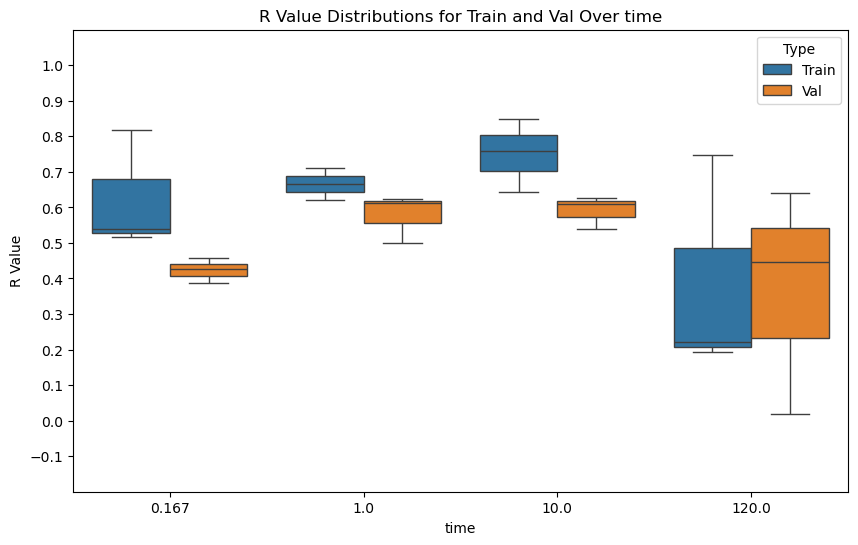

concat plot_df
nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.223060  0.779390  1.000000  1.000000        6  train_MD_Simulated_1   
1    0.069090  0.348630  0.986250  1.000000        7  train_MD_Simulated_1   
2    0.005560  0.032860  0.284060  0.981870        8  train_MD_Simulated_1   
3    0.047970  0.254980  0.947320  1.000000        9  train_MD_Simulated_1   
4    0.000370  0.002240  0.022200  0.236200       10  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
235  0.005090  0.029746  0.231747  0.567219       26    val_MD_Simulated_3   
236  0.109272  0.405923  0.725732  0.999629       27    val_MD_Simulated_3   
237  0.277297  0.713731  0.998796  1.000000       28    val_MD_Simulated_3   
238  0.547890  0.726386  0.998796  1.000000       29    val_MD_Simulated_3   
239  0.925022  0.999994  1.000000  1.000000       30    val_MD_Simulated_3   

     ResStr  ResEnd                      

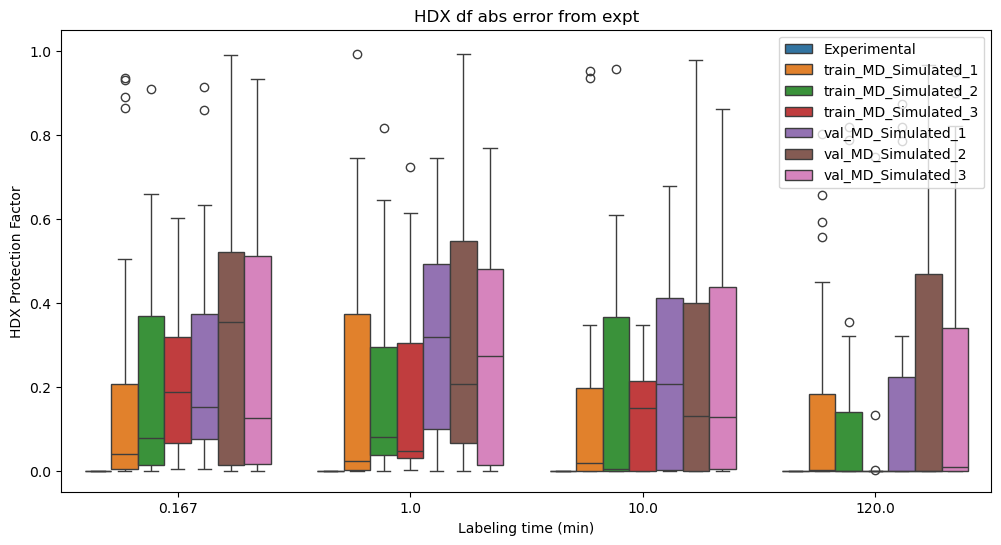

plotting MSE for nan_df
plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.22306  0.77939  1.00000  1.00000        6  train_MD_Simulated_1   
1    0.06909  0.34863  0.98625  1.00000        7  train_MD_Simulated_1   
2    0.00556  0.03286  0.28406  0.98187        8  train_MD_Simulated_1   
3    0.04797  0.25498  0.94732  1.00000        9  train_MD_Simulated_1   
4    0.00037  0.00224  0.02220  0.23620       10  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
276  0.00963  0.05627  0.43963  0.99904       36          Experimental   
277  0.01757  0.10068  0.65396  1.00000       37          Experimental   
278  0.09888  0.46390  0.99804  1.00000       38          Experimental   
279  0.00650  0.03831  0.32339  0.99079       39          Experimental   
280  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       N

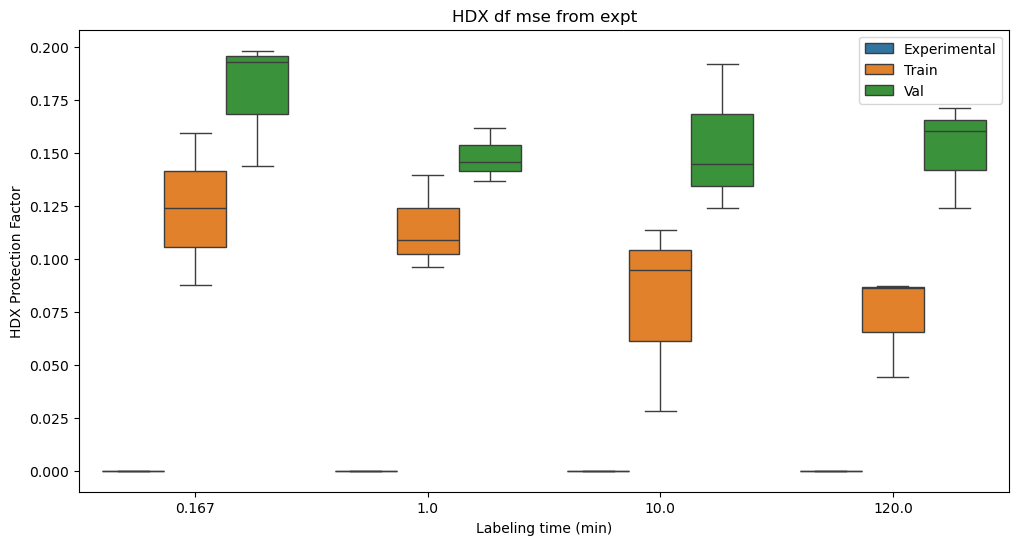

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Saving experiment to:  logs/RedundantK_R3_BPTITtut15_1708887642.pkl
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/c

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the fol

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_2x10^0

Contacts readContacts read
Hbonds read

Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_5x10^0
/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_4x10^0Contacts read

Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.29198944069035854, 2.0691144458476027), (array([0.5, 0.5]), 0.29198944069035854, 2.0691144458476027), (array([0.5, 0.5]), 0.29198944069035854, 2.0691144458476027), (array([0.5, 0.5]), 0.29198944069035854, 2.0691144458476027)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/XtureK_xR

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_1
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

Splitting segments for MD_Simulated by spatial split across Xture (alpha vs beta) and redundancy
HDX residues:  [ 4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 50 51 52 53 54
 55 56]
/home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5PTI_chain_A.pdb
Error running DSSP: Command '['mkdssp', 'do_mkdssp.pdb', 'dssp_file.dssp']' returned non-zero exit status 127.
Unstructured residues:  []
Sequences with unstructured residues removed:      ResStr  ResEnd  peptide     calc_name   ResNums
0        4       5        0  Experimental    [4, 5]
1        5       6        1  Experimental    [5, 6]
2        6       7        2  Experimental    [6, 7]
3        9      10        3  Experimental   [9, 10]
4       11      12        4  Experimental  [11, 12]
5       13      14        5  Experimental  [13, 14]
6       15      16        6  Experimental  [15, 16]
7       16      17        7  Experimental  [16, 17]
8      

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
mkdssp: error while loading shared libraries: libboost_thread.so.1.73.0: cannot open shared object file: No such file or directory
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/skle

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.25954504483879626, 1.049182256855258), (array([0.5, 0.5]), 0.25954504483879626, 1.049182256855258), (array([0.5, 0.5]), 0.25954504483879626, 1.049182256855258), (array([0.5, 0.5]), 0.25954504483879626, 1.049182256855258)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/XtureK_xR_BPT

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_2
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

/home/alexi/Documents/ValDX/raw_data/raw_pdbs/clean_pdbs/5PTI_chain_A.pdb
Error running DSSP: Command '['mkdssp', 'do_mkdssp.pdb', 'dssp_file.dssp']' returned non-zero exit status 127.
Unstructured residues:  []
Sequences with unstructured residues removed:      ResStr  ResEnd  peptide     calc_name   ResNums
0        4       5        0  Experimental    [4, 5]
1        5       6        1  Experimental    [5, 6]
2        6       7        2  Experimental    [6, 7]
3        9      10        3  Experimental   [9, 10]
4       11      12        4  Experimental  [11, 12]
5       13      14        5  Experimental  [13, 14]
6       15      16        6  Experimental  [15, 16]
7       16      17        7  Experimental  [16, 17]
8       17      18        8  Experimental  [17, 18]
9       18      19        9  Experimental  [18, 19]
10      19      20       10  Experimental  [19, 20]
11      20      21       11  Experimental  [20, 21]
12      21      22       12  Experimental  [21, 22]
13      22   

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_4x10^0


Contacts readContacts readContacts read


Hbonds readHbonds readHbonds read


Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
/home/alexi/Documents/ValDX/data/XtureK_xR_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.30233470822722663, 1.284797280307727), (array([0.5, 0.5]), 0.30233470822722663, 1.284797280307727), (array([0.5, 0.5]), 0.30233470822722663, 1.284797280307727), (array([0.5, 0.5]), 0.30233470822722663, 1.284797280307727)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/XtureK_xR_BPT

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_3
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

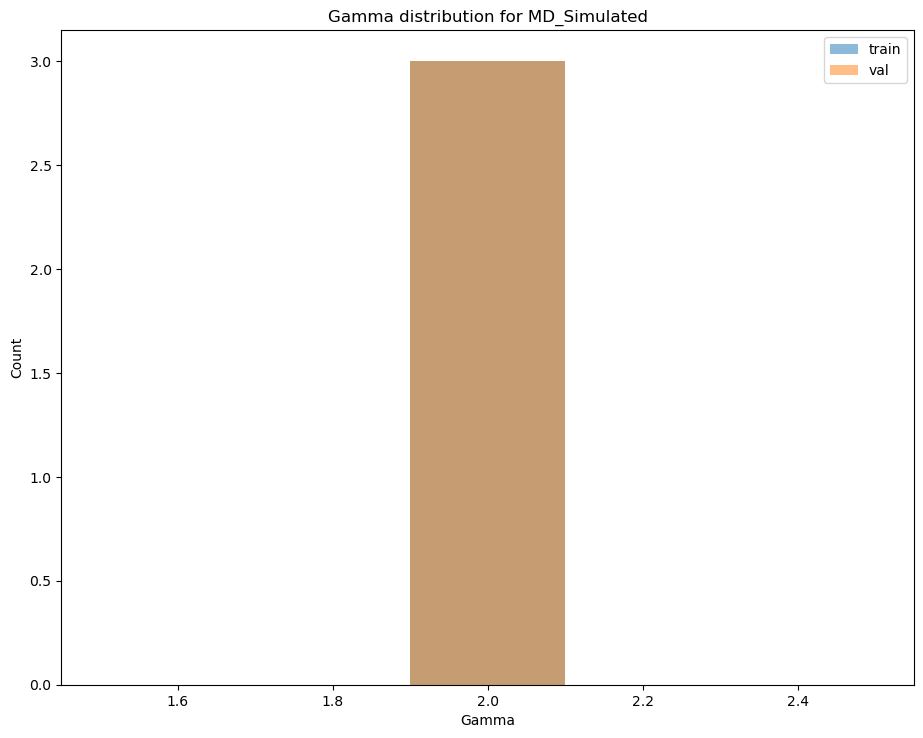

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plotting dfracs compare for train
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
279  0.008896  0.051559  0.374540  0.931965       36  test_MD_Simulated_3   
280  0.386566  0.543215  0.797967  0.999991       37  test_MD_Simulated_3   
281  0.832297  0.999898  1.000000  1.000000       38  test_MD_Simulated_3   
282  0.457725  0.526261  0.708485  0

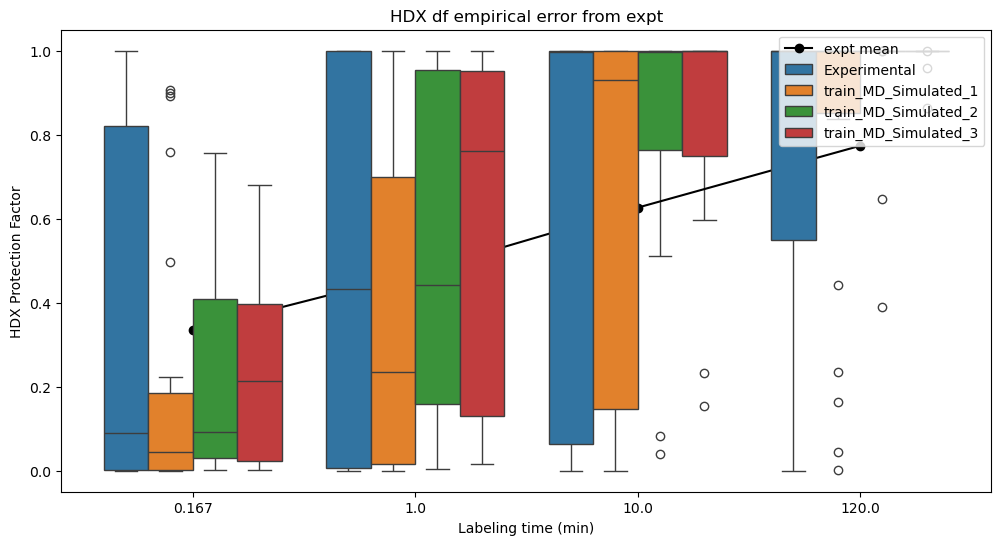

plotting dfracs compare for val
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
279  0.008896  0.051559  0.374540  0.931965       36  test_MD_Simulated_3   
280  0.386566  0.543215  0.797967  0.999991       37  test_MD_Simulated_3   
281  0.832297  0.999898  1.000000  1.000000       38  test_MD_Simulated_3   
282  0.457725  0.526261  0.708485  0.999229       39  test_MD_Simulated_3   
283  0.006636  0.039007  0.322276  0.976676       40  test_MD_Simulated_3   

     ResStr  ResEnd pat

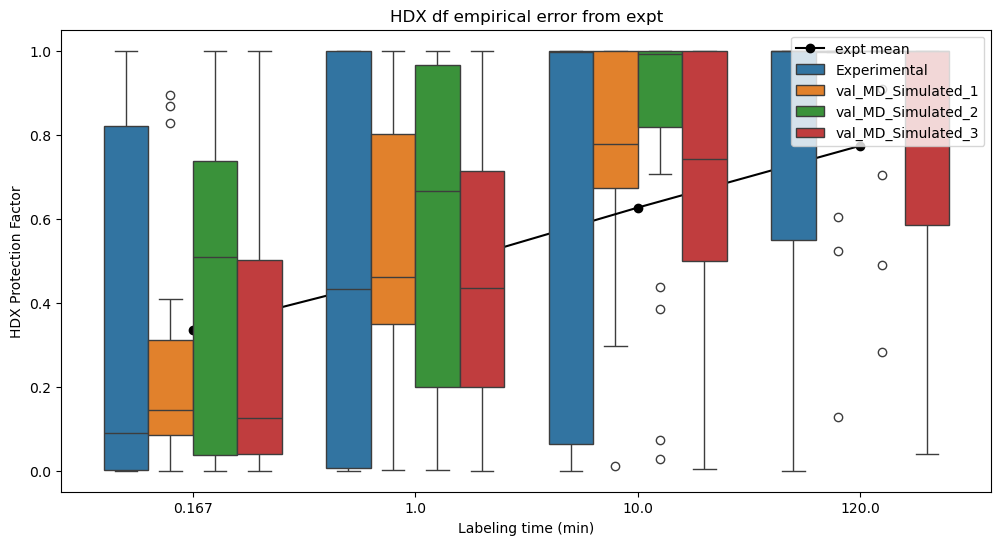

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2', 'test_MD_Simulated_3']
train_rep_peptides [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
val_rep_peptides [0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
val_rep_peptides [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

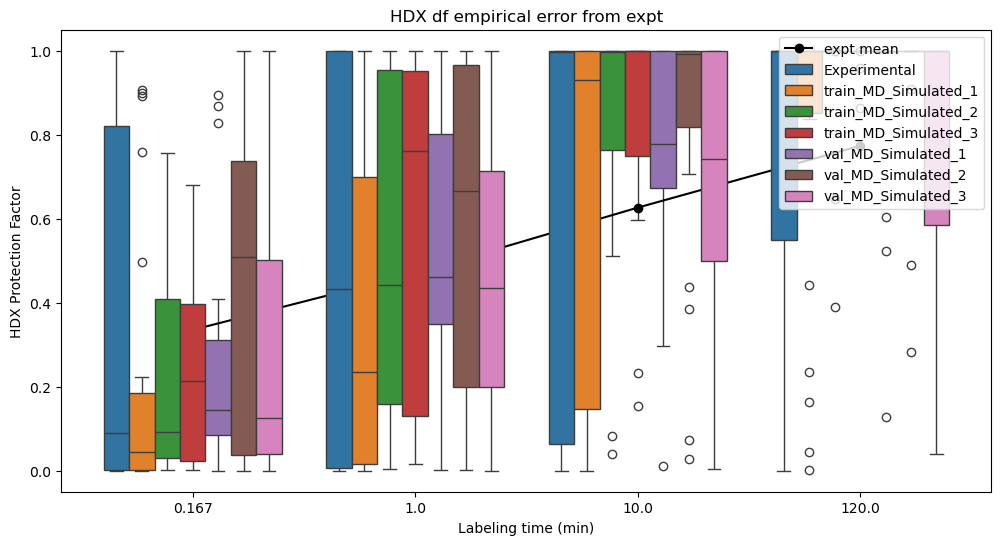

plotting dfracs compare abs for merge_df
plotting paired errors
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
156  0.005090  0.029746  0.231747  0.567219       26  val_MD_Simulated_3   
157  0.109272  0.405923  0.725732  0.999629       27  val_MD_Simulated_3   
158  0.277297  0.713731  0.998796  1.000000       28  val_MD_Simulated_3   
159  0.547890  0.726386  0.998796  1.000000       29  val_MD_Simulated_3   
160  0.925022  0.999994  1.000000  1.000000       30  val_MD_Simulated_3   

     ResStr  ResEnd    

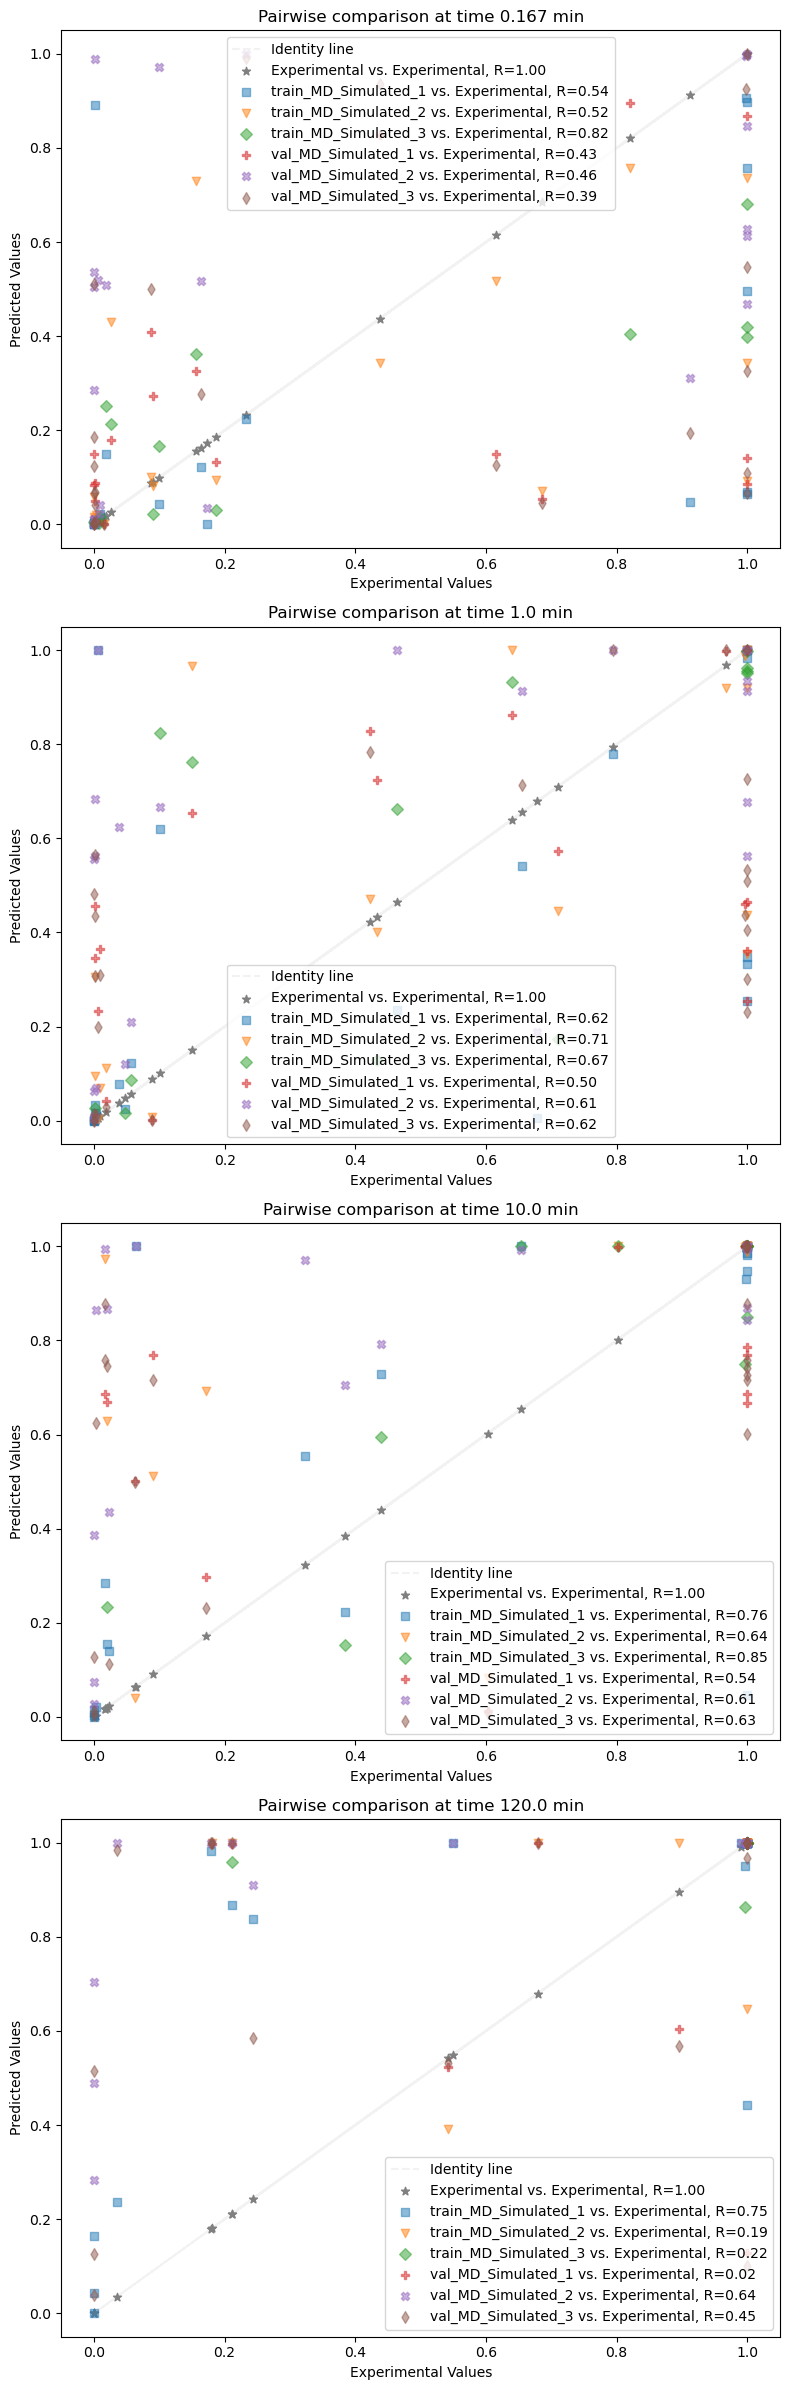

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


plotting R agreement
plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
156  0.005090  0.029746  0.231747  0.567219       26  val_MD_Simulated_3   
157  0.109272  0.405923  0.725732  0.999629       27  val_MD_Simulated_3   
158  0.277297  0.713731  0.998796  1.000000       28  val_MD_Simulated_3   
159  0.547890  0.726386  0.998796  1.000000       29  val_MD_Simulated_3   
160  0.925022  0.999994  1.000000  1.000000       30  val_MD_Simulated_3   

     ResStr  ResEnd            

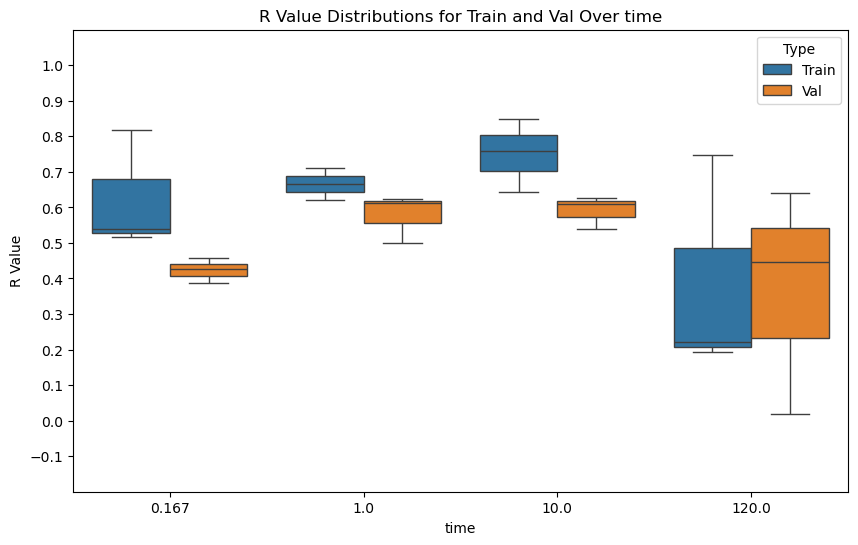

concat plot_df
nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.223060  0.779390  1.000000  1.000000        6  train_MD_Simulated_1   
1    0.069090  0.348630  0.986250  1.000000        7  train_MD_Simulated_1   
2    0.005560  0.032860  0.284060  0.981870        8  train_MD_Simulated_1   
3    0.047970  0.254980  0.947320  1.000000        9  train_MD_Simulated_1   
4    0.000370  0.002240  0.022200  0.236200       10  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
235  0.005090  0.029746  0.231747  0.567219       26    val_MD_Simulated_3   
236  0.109272  0.405923  0.725732  0.999629       27    val_MD_Simulated_3   
237  0.277297  0.713731  0.998796  1.000000       28    val_MD_Simulated_3   
238  0.547890  0.726386  0.998796  1.000000       29    val_MD_Simulated_3   
239  0.925022  0.999994  1.000000  1.000000       30    val_MD_Simulated_3   

     ResStr  ResEnd                      

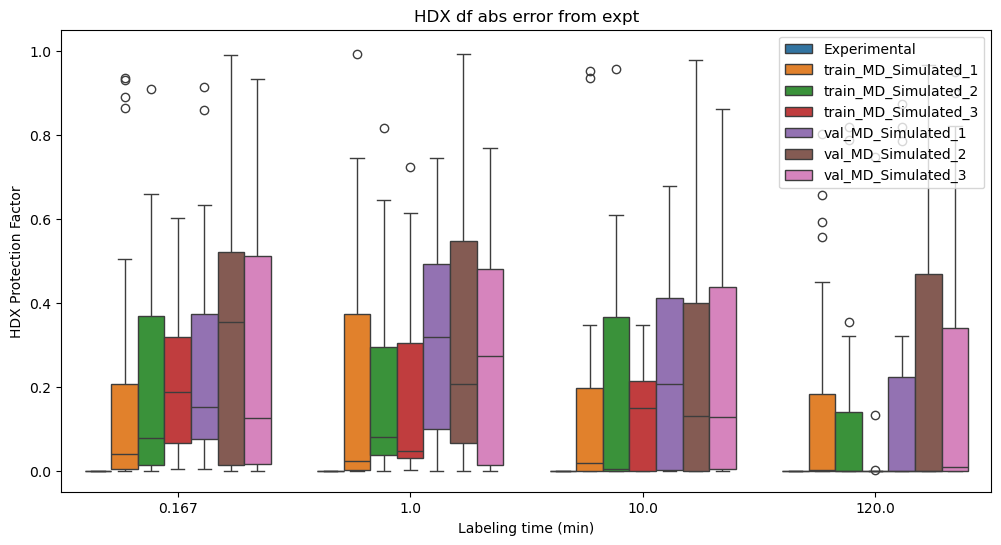

plotting MSE for nan_df
plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.22306  0.77939  1.00000  1.00000        6  train_MD_Simulated_1   
1    0.06909  0.34863  0.98625  1.00000        7  train_MD_Simulated_1   
2    0.00556  0.03286  0.28406  0.98187        8  train_MD_Simulated_1   
3    0.04797  0.25498  0.94732  1.00000        9  train_MD_Simulated_1   
4    0.00037  0.00224  0.02220  0.23620       10  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
276  0.00963  0.05627  0.43963  0.99904       36          Experimental   
277  0.01757  0.10068  0.65396  1.00000       37          Experimental   
278  0.09888  0.46390  0.99804  1.00000       38          Experimental   
279  0.00650  0.03831  0.32339  0.99079       39          Experimental   
280  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       N

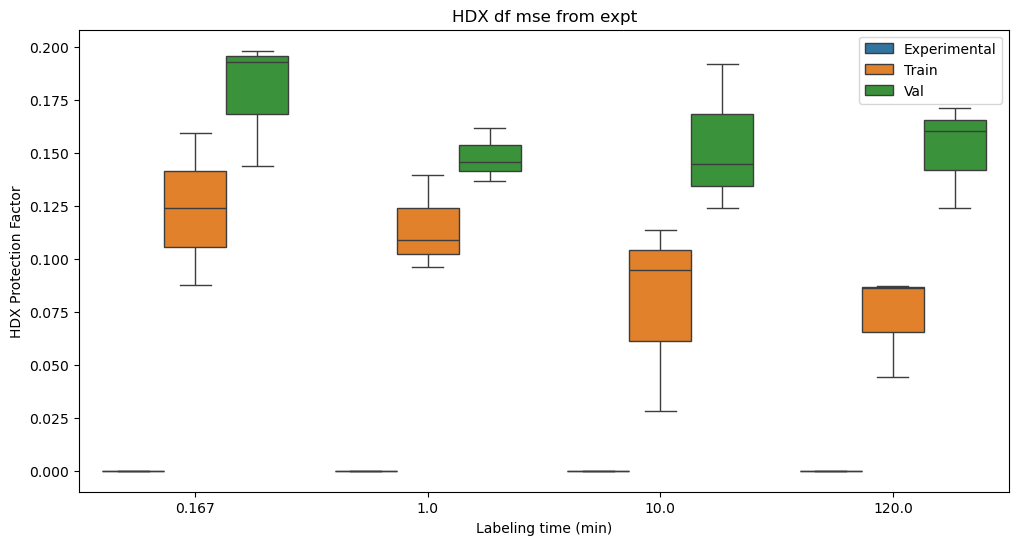

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Saving experiment to:  logs/XtureK_xR_BPTITtut14_1708887661.pkl
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the fol

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_3x10^0

Contacts readContacts read

Hbonds readHbonds read

Segments and experimental dfracs readSegments and experimental dfracs read

/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_4x10^0
/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.3054442010887804, 1.876176142497891), (array([0.5, 0.5]), 0.3054442010887804, 1.876176142497891), (array([0.5, 0.5]), 0.3054442010887804, 1.876176142497891), (array([0.5, 0.5]), 0.3054442010887804, 1.876176142497891)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/pINspace_

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_1
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

Writing val PDB to results/pINspace_Sp_BPTITtut/val_1_pINspace_Sp_BPTITtut_20240225-190107.pdb
Splitting segments for MD_Simulated by spatial split: random point in space
HDX residues:  [ 4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 50 51 52 53 54
 55 56]
Random residue:  9
Random coords:  [[29.16   4.238  0.321]]
Residue selection string:  (resnum 4 and name CA) or (resnum 5 and name CA) or (resnum 6 and name CA) or (resnum 7 and name CA) or (resnum 9 and name CA) or (resnum 10 and name CA) or (resnum 11 and name CA) or (resnum 12 and name CA) or (resnum 13 and name CA) or (resnum 14 and name CA) or (resnum 15 and name CA) or (resnum 16 and name CA) or (resnum 17 and name CA) or (resnum 18 and name CA) or (resnum 19 and name CA) or (resnum 20 and name CA) or (resnum 21 and name CA) or (resnum 22 and name CA) or (resnum 23 and name CA) or (resnum 24 and name CA) or (resnum 25 and name CA) or (resnum 26 

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_5x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds read

Hbonds read

Segments and experimental dfracs read
Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.3388071030223817, 1.0683225725559682), (array([0.5, 0.5]), 0.3388071030223817, 1.0683225725559682), (array([0.5, 0.5]), 0.3388071030223817, 1.0683225725559682), (array([0.5, 0.5]), 0.3388071030223817, 1.0683225725559682)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/pINsp

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_2
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

Splitting segments for MD_Simulated by spatial split: random point in space
HDX residues:  [ 4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 50 51 52 53 54
 55 56]
Random residue:  25
Random coords:  [[25.937  6.771 -9.71 ]]
Residue selection string:  (resnum 4 and name CA) or (resnum 5 and name CA) or (resnum 6 and name CA) or (resnum 7 and name CA) or (resnum 9 and name CA) or (resnum 10 and name CA) or (resnum 11 and name CA) or (resnum 12 and name CA) or (resnum 13 and name CA) or (resnum 14 and name CA) or (resnum 15 and name CA) or (resnum 16 and name CA) or (resnum 17 and name CA) or (resnum 18 and name CA) or (resnum 19 and name CA) or (resnum 20 and name CA) or (resnum 21 and name CA) or (resnum 22 and name CA) or (resnum 23 and name CA) or (resnum 24 and name CA) or (resnum 25 and name CA) or (resnum 26 and name CA) or (resnum 27 and name CA) or (resnum 28 and name CA) or (resnum 29 and name CA) 

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_3x10^0


Contacts readContacts readContacts read


Hbonds readHbonds readHbonds read


Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
/home/alexi/Documents/ValDX/data/pINspace_Sp_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.3053010686344379, 1.3124640133056305), (array([0.5, 0.5]), 0.3053010686344379, 1.3124640133056305), (array([0.5, 0.5]), 0.3053010686344379, 1.3124640133056305), (array([0.5, 0.5]), 0.3053010686344379, 1.3124640133056305)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/pINsp

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_3
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

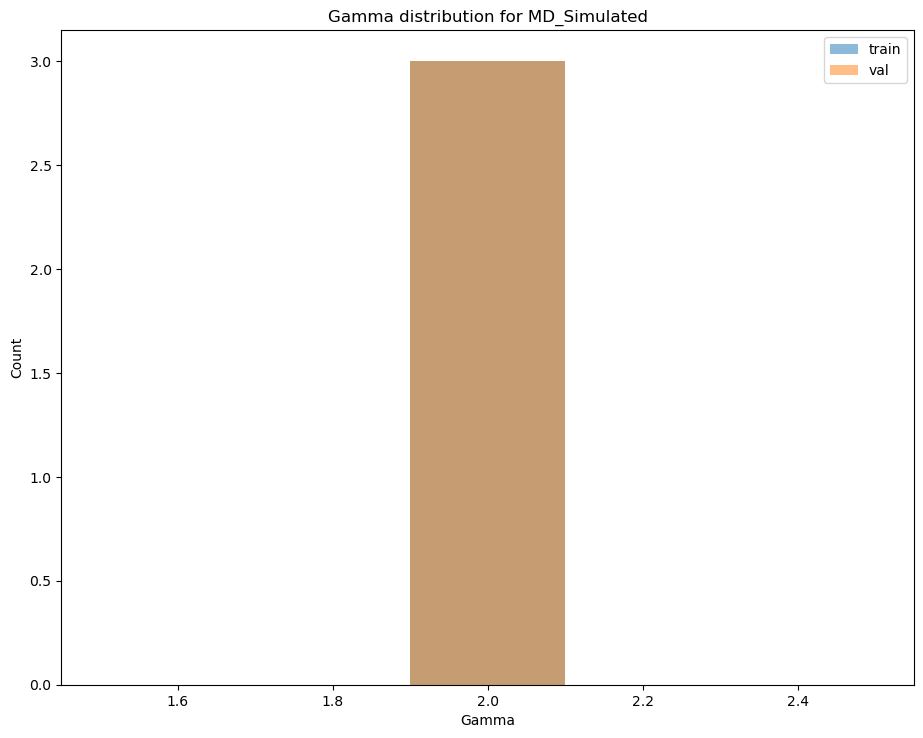

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plotting dfracs compare for train
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
262  0.008005  0.046545  0.347706  0.914937       36  test_MD_Simulated_3   
263  0.376568  0.539059  0.779082  0.999972       37  test_MD_Simulated_3   
264  0.817606  0.999841  1.000000  1.000000       38  test_MD_Simulated_3   
265  0.451809  0.523460  0.690786  0

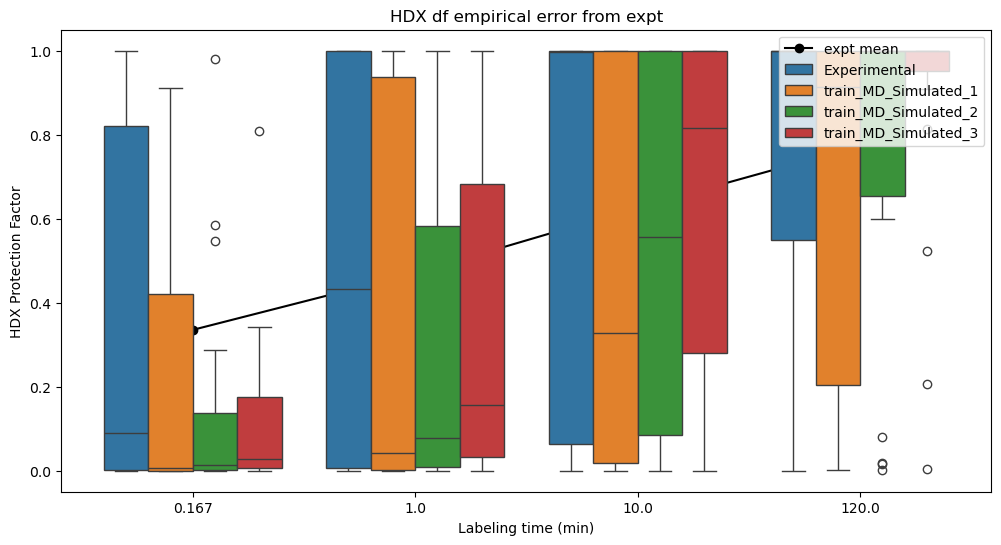

plotting dfracs compare for val
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
262  0.008005  0.046545  0.347706  0.914937       36  test_MD_Simulated_3   
263  0.376568  0.539059  0.779082  0.999972       37  test_MD_Simulated_3   
264  0.817606  0.999841  1.000000  1.000000       38  test_MD_Simulated_3   
265  0.451809  0.523460  0.690786  0.998435       39  test_MD_Simulated_3   
266  0.005914  0.034830  0.293527  0.966796       40  test_MD_Simulated_3   

     ResStr  ResEnd pat

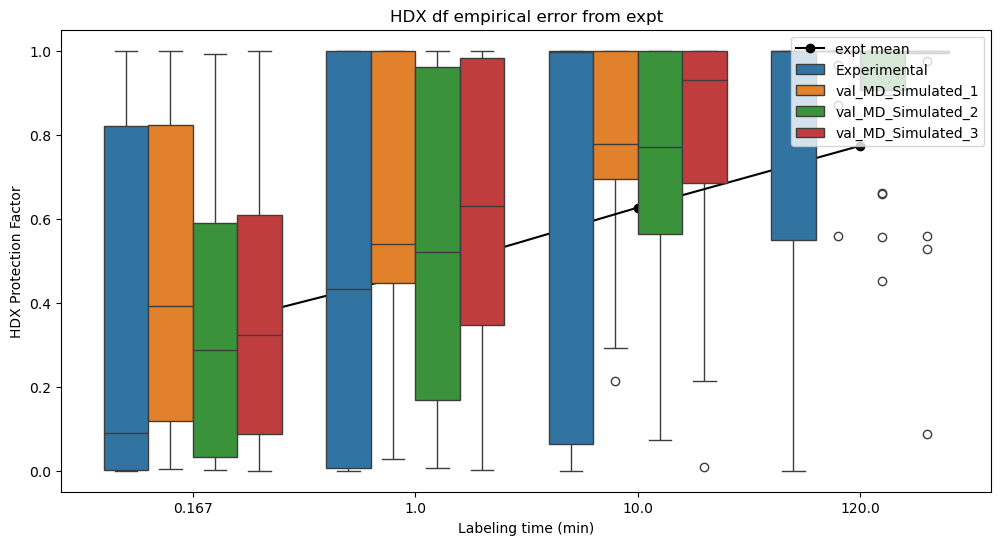

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2', 'test_MD_Simulated_3']
train_rep_peptides [0, 3, 10, 11, 12, 13, 22, 23, 24, 28, 29, 30, 31, 32, 33, 35]
val_rep_peptides [2, 5, 6, 7, 8, 15, 16, 17, 18, 26, 27, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [0, 1, 2, 3, 4, 11, 12, 13, 14, 20, 21, 22, 23, 24, 28, 29, 30, 31, 32]
val_rep_peptides [5, 6, 7, 8, 9, 16, 17, 18, 26, 27, 33, 34, 35, 36, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [0, 1, 2, 12, 

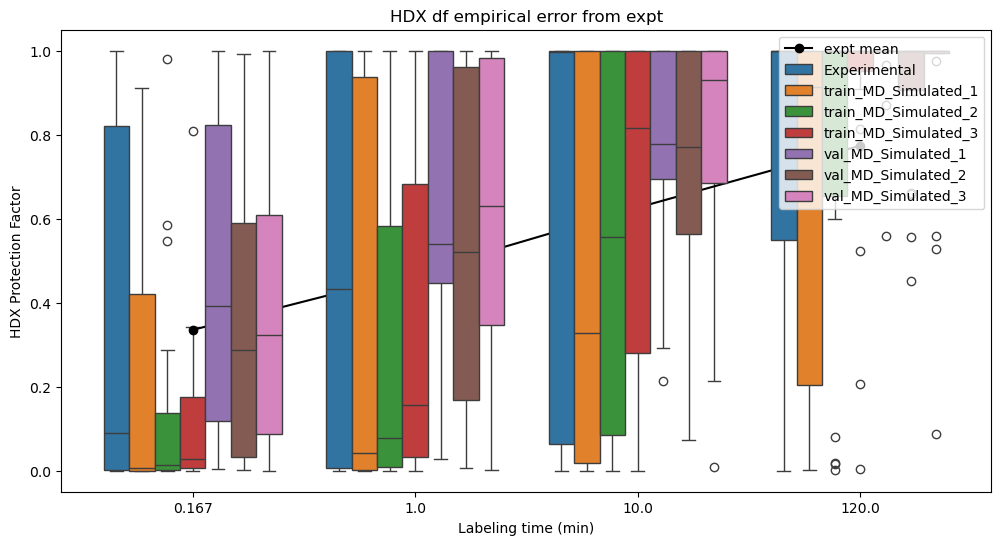

plotting dfracs compare abs for merge_df
plotting paired errors
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
139  0.101349  0.388650  0.709467  0.999259       27  val_MD_Simulated_3   
140  0.263809  0.698537  0.998147  1.000000       28  val_MD_Simulated_3   
141  0.544625  0.714337  0.998147  1.000000       29  val_MD_Simulated_3   
142  0.380113  0.736269  0.999192  1.000000       33  val_MD_Simulated_3   
143  0.529311  0.975765  1.000000  1.000000       34  val_MD_Simulated_3   

     ResStr  ResEnd    

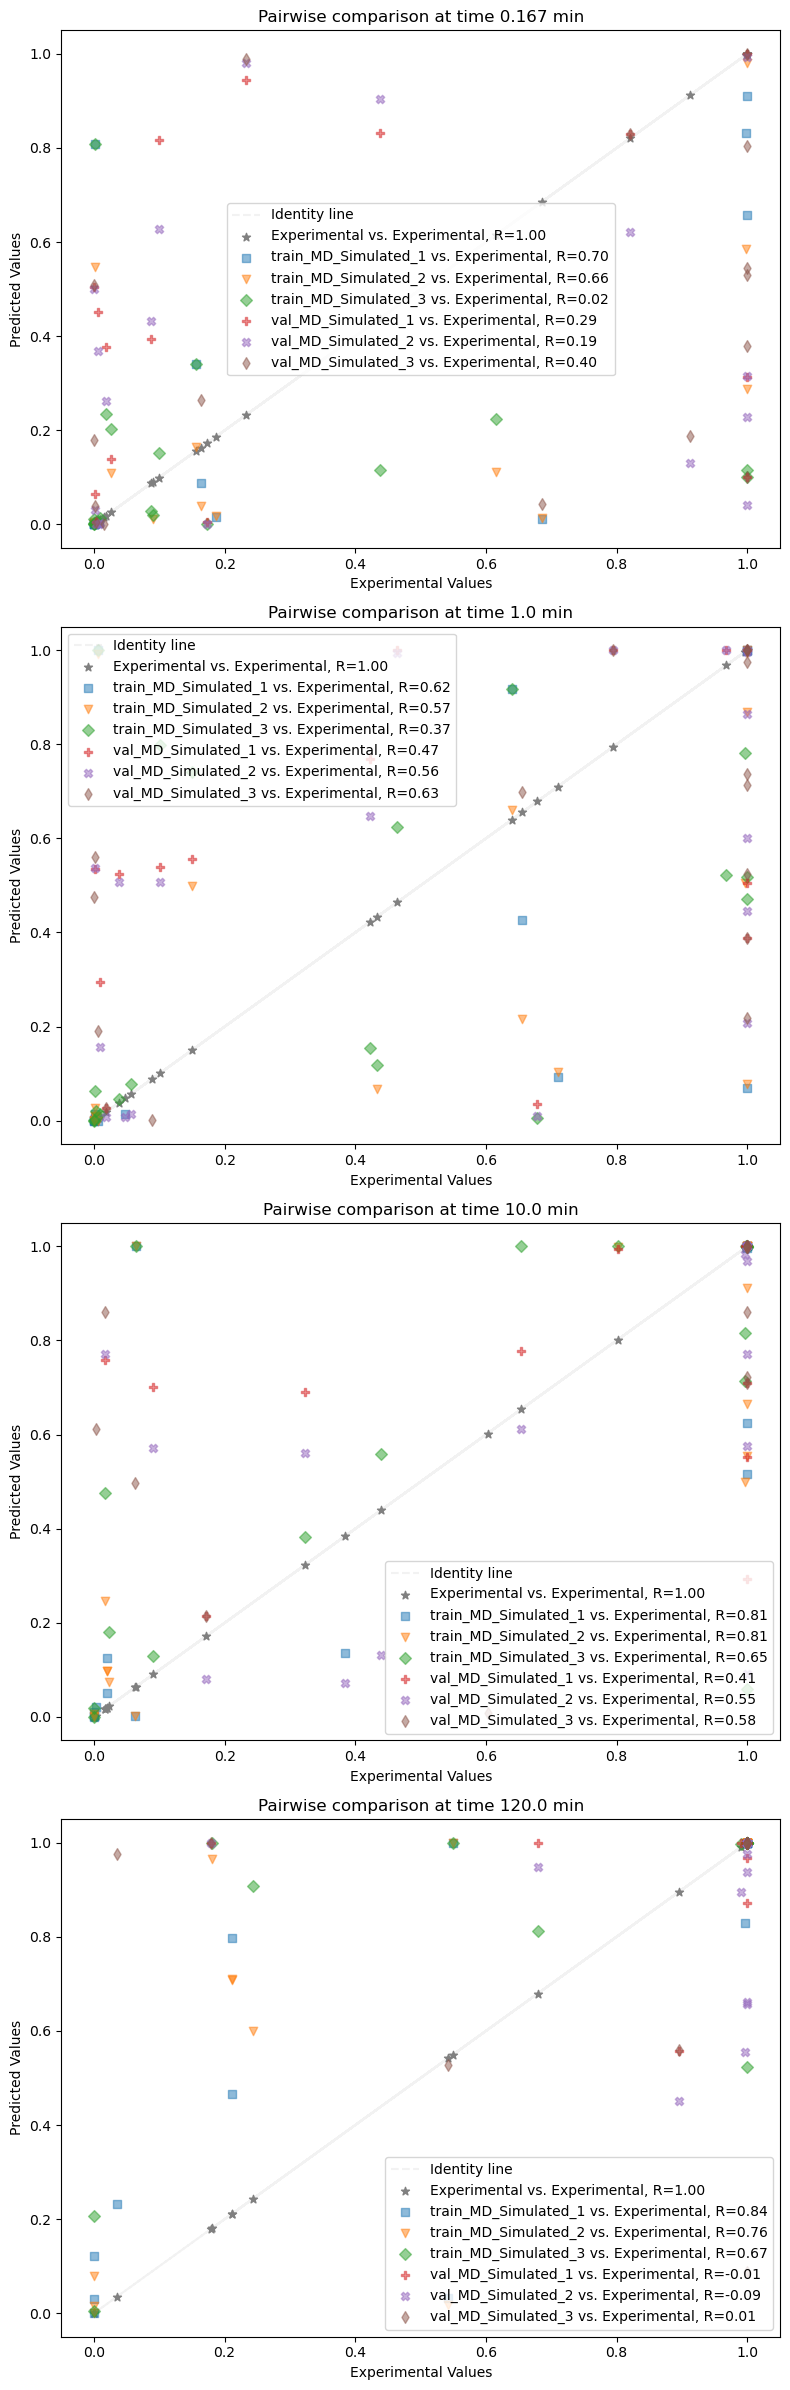

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


plotting R agreement
plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
139  0.101349  0.388650  0.709467  0.999259       27  val_MD_Simulated_3   
140  0.263809  0.698537  0.998147  1.000000       28  val_MD_Simulated_3   
141  0.544625  0.714337  0.998147  1.000000       29  val_MD_Simulated_3   
142  0.380113  0.736269  0.999192  1.000000       33  val_MD_Simulated_3   
143  0.529311  0.975765  1.000000  1.000000       34  val_MD_Simulated_3   

     ResStr  ResEnd            

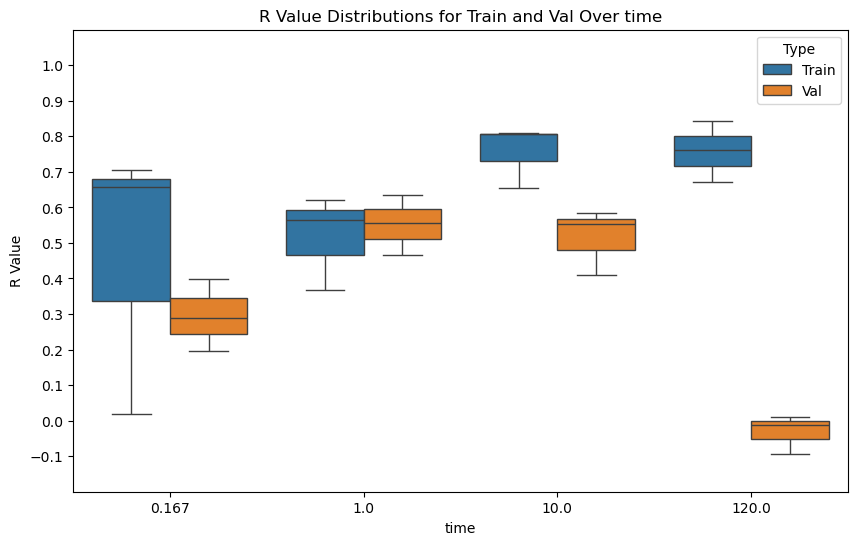

concat plot_df
nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.340380  0.917220  1.000000  1.000000        0  train_MD_Simulated_1   
1    0.016270  0.093570  0.625580  0.999990        3  train_MD_Simulated_1   
2    0.000370  0.002200  0.021820  0.232570       10  train_MD_Simulated_1   
3    0.000040  0.000250  0.002520  0.029780       11  train_MD_Simulated_1   
4    0.000000  0.000010  0.000110  0.001340       12  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
201  0.101349  0.388650  0.709467  0.999259       27    val_MD_Simulated_3   
202  0.263809  0.698537  0.998147  1.000000       28    val_MD_Simulated_3   
203  0.544625  0.714337  0.998147  1.000000       29    val_MD_Simulated_3   
204  0.380113  0.736269  0.999192  1.000000       33    val_MD_Simulated_3   
205  0.529311  0.975765  1.000000  1.000000       34    val_MD_Simulated_3   

     ResStr  ResEnd                      

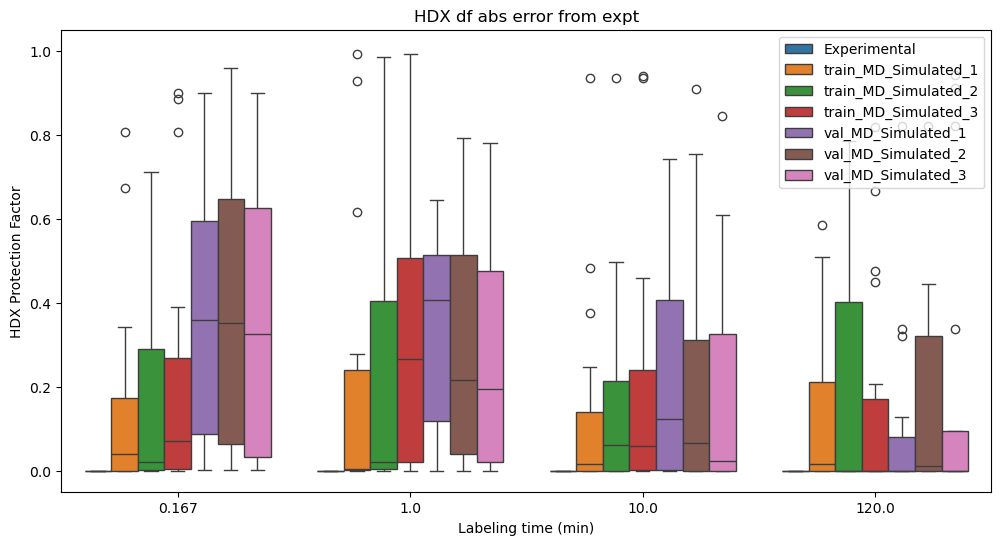

plotting MSE for nan_df
plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.34038  0.91722  1.00000  1.00000        0  train_MD_Simulated_1   
1    0.01627  0.09357  0.62558  0.99999        3  train_MD_Simulated_1   
2    0.00037  0.00220  0.02182  0.23257       10  train_MD_Simulated_1   
3    0.00004  0.00025  0.00252  0.02978       11  train_MD_Simulated_1   
4    0.00000  0.00001  0.00011  0.00134       12  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
242  0.00963  0.05627  0.43963  0.99904       36          Experimental   
243  0.01757  0.10068  0.65396  1.00000       37          Experimental   
244  0.09888  0.46390  0.99804  1.00000       38          Experimental   
245  0.00650  0.03831  0.32339  0.99079       39          Experimental   
246  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       N

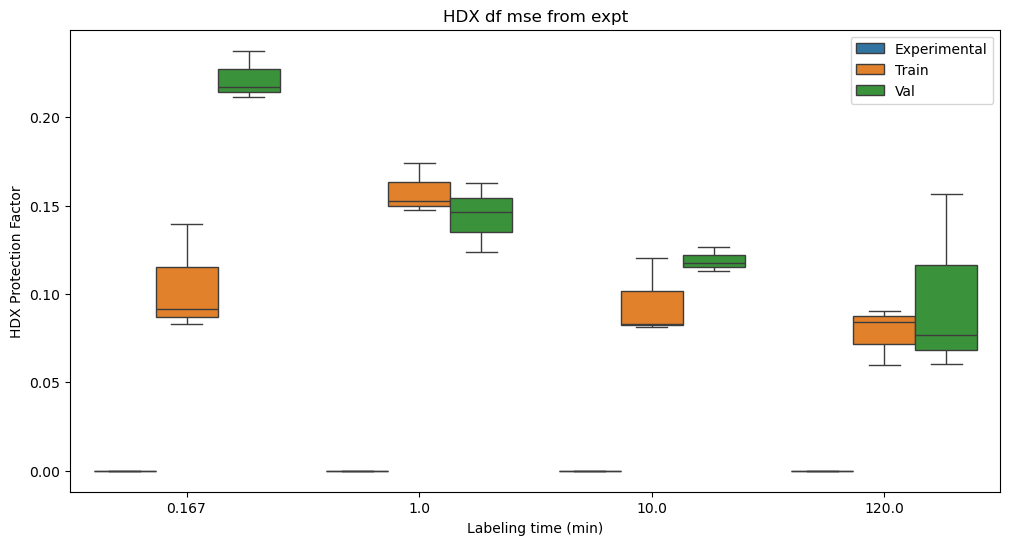

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Saving experiment to:  logs/pINspace_Sp_BPTITtut14_1708887680.pkl
envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/cal

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the fol

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_3x10^0

Contacts readContacts read

Hbonds readHbonds read

Segments and experimental dfracs readSegments and experimental dfracs read

/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_4x10^0
/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_1/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.28047343255344165, 2.0151778149893045), (array([0.5, 0.5]), 0.28047343255344165, 2.0151778149893045), (array([0.5, 0.5]), 0.28047343255344165, 2.0151778149893045), (array([0.5, 0.5]), 0.28047343255344165, 2.0151778149893045)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/spaceK_SR

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_1
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

centrality
1    82
Name: count, dtype: int64
train_segs
    ResStr  ResEnd  peptide             calc_name
3        9      10        3  train_MD_Simulated_2
11      20      21       11  train_MD_Simulated_2
12      21      22       12  train_MD_Simulated_2
21      31      32       21  train_MD_Simulated_2
22      32      33       22  train_MD_Simulated_2
Saved train MD_Simulated_2 segments to /home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_2/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 3 11 12 21 22 29 30 31 32 33]
Saved val MD_Simulated_2 segments to /home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/val_MD_Simulated_2/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 0  1  4  5  6  7  8  9 14 15 16 19 24 25 26 27 35 36 37 38 39]
train_HDX_data
     0.167      1.0     10.0    120.0  peptide             calc_name  \
0  0.18680  0.71010  1.00000  1.00000        3  train_MD_Simulated_2   
1  0.00000  0.00000  0.00003  0.00037       11

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_4x10^0


Contacts readContacts read

Contacts readHbonds readHbonds read


Hbonds read
Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_2/reweighting_gamma_2x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Finished reweighting
[(array([0.5, 0.5]), 0.3086059203642806, 2.0508978692783804), (array([0.5, 0.5]), 0.3086059203642806, 2.0508978692783804), (array([0.5, 0.5]), 0.3086059203642806, 2.0508978692783804), (array([0.5, 0.5]), 0.3086059203642806, 2.0508978692783804)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/spaceK_SR_BPT

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Residues for recalculation: [ 9 10 20 21 22 31 32 33 41 42 43 44 45 46 47]
[ 9 10 20 21 22 31 32 33 41 42 43 44 45 46 47]
dict_keys([3, 4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])
Residues for recalculation: [10 20 21 22 31 32 33 41 42 43 44 45 46 47]
2
weights sum:  1.0
Recalculating no_weight_MD_Simulated_2
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28      

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

centrality
1    82
Name: count, dtype: int64
train_segs
    ResStr  ResEnd  peptide             calc_name
4       11      12        4  train_MD_Simulated_3
8       17      18        8  train_MD_Simulated_3
9       18      19        9  train_MD_Simulated_3
10      19      20       10  train_MD_Simulated_3
16      26      27       16  train_MD_Simulated_3
Saved train MD_Simulated_3 segments to /home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_3/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 4  8  9 10 16 23 24 25 26 27 28 39]
Saved val MD_Simulated_3 segments to /home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/val_MD_Simulated_3/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 0  1  5  6 14 32 35]
train_HDX_data
      0.167      1.0     10.0    120.0  peptide             calc_name  \
0   0.99880  1.00000  1.00000  1.00000        4  train_MD_Simulated_3   
1   0.00028  0.00165  0.01638  0.17975        8  train_MD_Simulated_3   
2   0.9

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaco

/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/spaceK_SR_BPTITtut14/train_MD_Simulated_3/reweighting_gamma_3x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read

Finished reweighting
[(array([0.5, 0.5]), 0.2673610983288988, 0.4536785587331589), (array([0.5, 0.5]), 0.2673610983288988, 0.4536785587331589), (array([0.5, 0.5]), 0.2673610983288988, 0.4536785587331589), (array([0.5, 0.5]), 0.2673610983288988, 0.4536785587331589)]
RW_do_reweighting is False
Path /home/alexi/Documents/ValDX/data/spaceK_SR_BPT

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


Recalculating no_weight_MD_Simulated_3
    ResStr  ResEnd  peptide
0        4       5        0
1        5       6        1
2        6       7        2
3        9      10        3
4       11      12        4
5       13      14        5
6       15      16        6
7       16      17        7
8       17      18        8
9       18      19        9
10      19      20       10
11      20      21       11
12      21      22       12
13      22      23       13
14      23      24       14
15      24      25       15
16      26      27       16
17      27      28       17
18      28      29       18
19      29      30       19
20      30      31       20
21      31      32       21
22      32      33       22
23      33      34       23
24      34      35       24
25      35      36       25
26      36      37       26
27      37      38       27
28      40      41       28
29      41      42       29
30      42      43       30
31      43      44       31
32      44      45       32
33      4

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:282: Depreca

Writing val PDB to results/spaceK_SR_BPTITtut/val_3_spaceK_SR_BPTITtut_20240225-190136.pdb
Finished running VDX loop
Evaluating HDX
plotting gamma distributions


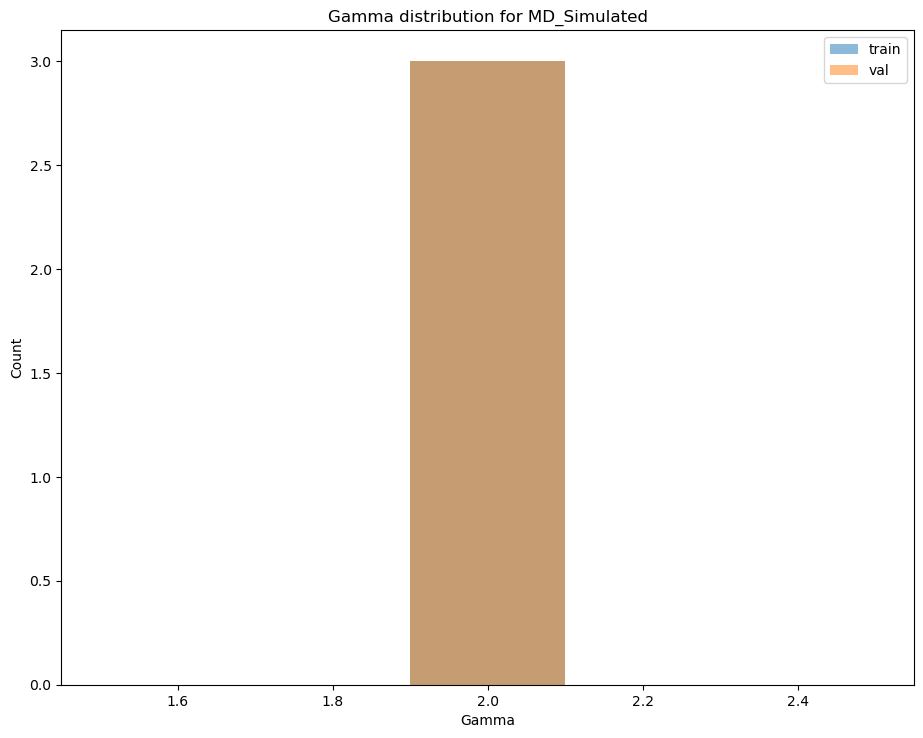

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plotting dfracs compare for train
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
239  0.030674  0.165174  0.722072  0.999845       36  test_MD_Simulated_3   
240  0.490235  0.632613  0.977065  1.000000       37  test_MD_Simulated_3   
241  0.957243  1.000000  1.000000  1.000000       38  test_MD_Simulated_3   
242  0.509406  0.595130  0.939407  1

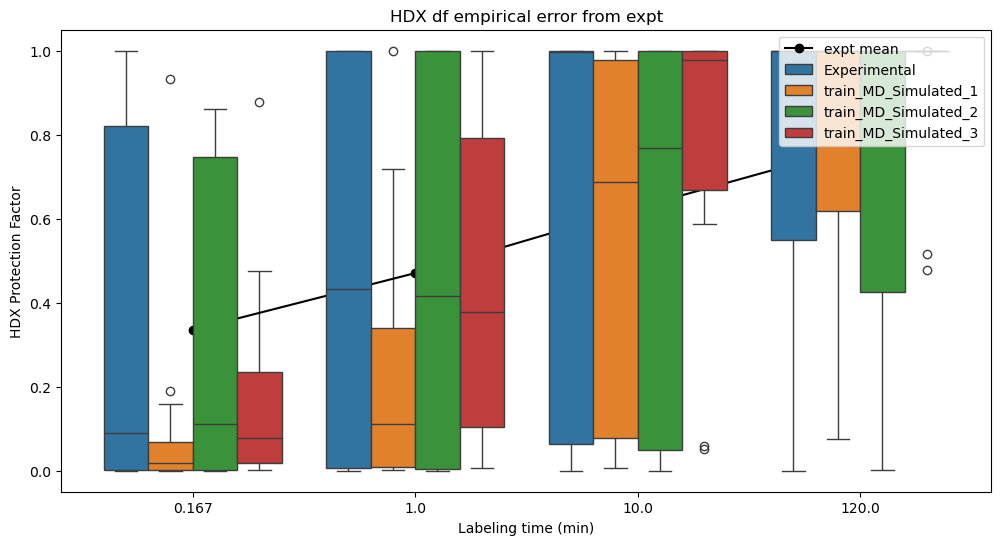

plotting dfracs compare for val
plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
239  0.030674  0.165174  0.722072  0.999845       36  test_MD_Simulated_3   
240  0.490235  0.632613  0.977065  1.000000       37  test_MD_Simulated_3   
241  0.957243  1.000000  1.000000  1.000000       38  test_MD_Simulated_3   
242  0.509406  0.595130  0.939407  1.000000       39  test_MD_Simulated_3   
243  0.025679  0.143169  0.757318  0.999997       40  test_MD_Simulated_3   

     ResStr  ResEnd pat

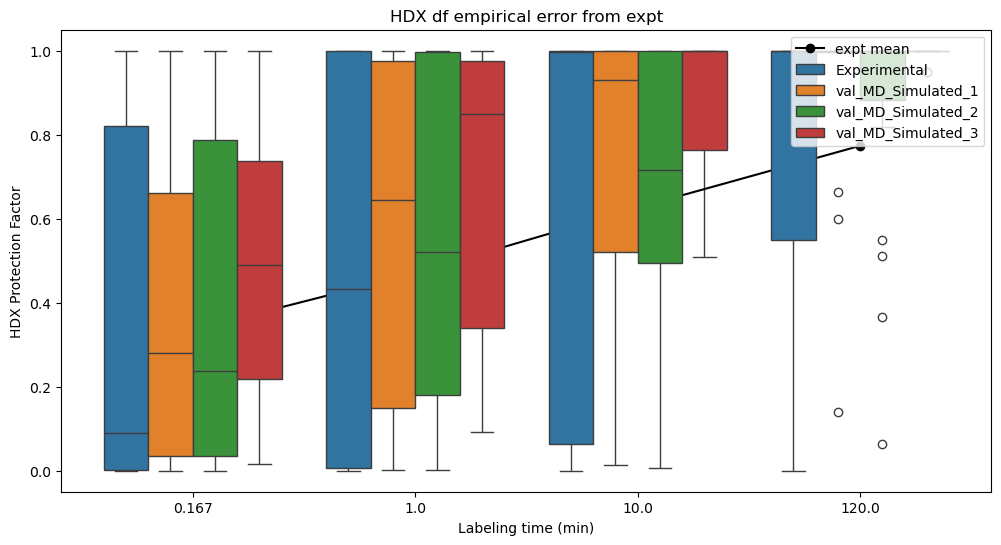

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2', 'test_MD_Simulated_3']
train_rep_peptides [3, 10, 11, 16, 17, 18, 22, 23, 24, 28, 29, 32, 37, 38, 39, 40]
val_rep_peptides [0, 1, 2, 5, 6, 7, 8, 13, 14, 20, 26, 27, 34, 35]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [3, 11, 12, 21, 22, 29, 30, 31, 32, 33]
val_rep_peptides [0, 1, 4, 5, 6, 7, 8, 9, 14, 15, 16, 19, 24, 25, 26, 27, 35, 36, 37, 38, 39]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [4, 8, 9, 10, 16, 23, 24, 25, 26, 27, 28, 

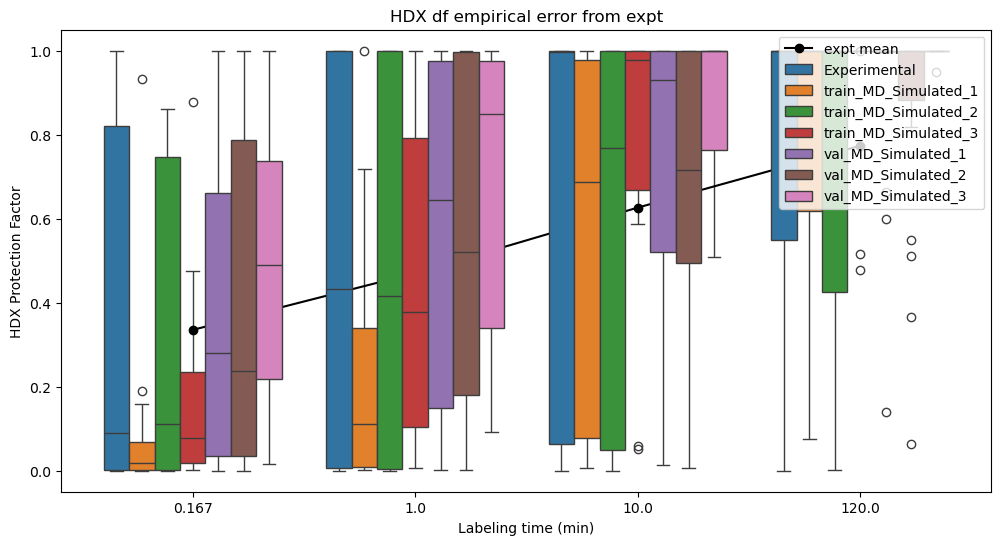

plotting dfracs compare abs for merge_df
plotting paired errors
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
116  0.970142  1.000000  1.000000  1.000000        5  val_MD_Simulated_3   
117  0.999999  1.000000  1.000000  1.000000        6  val_MD_Simulated_3   
118  0.016761  0.093696  0.508255  0.950111       14  val_MD_Simulated_3   
119  0.504248  0.584974  0.922370  1.000000       32  val_MD_Simulated_3   
120  0.016111  0.092339  0.605057  0.999845       35  val_MD_Simulated_3   

     ResStr  ResEnd    

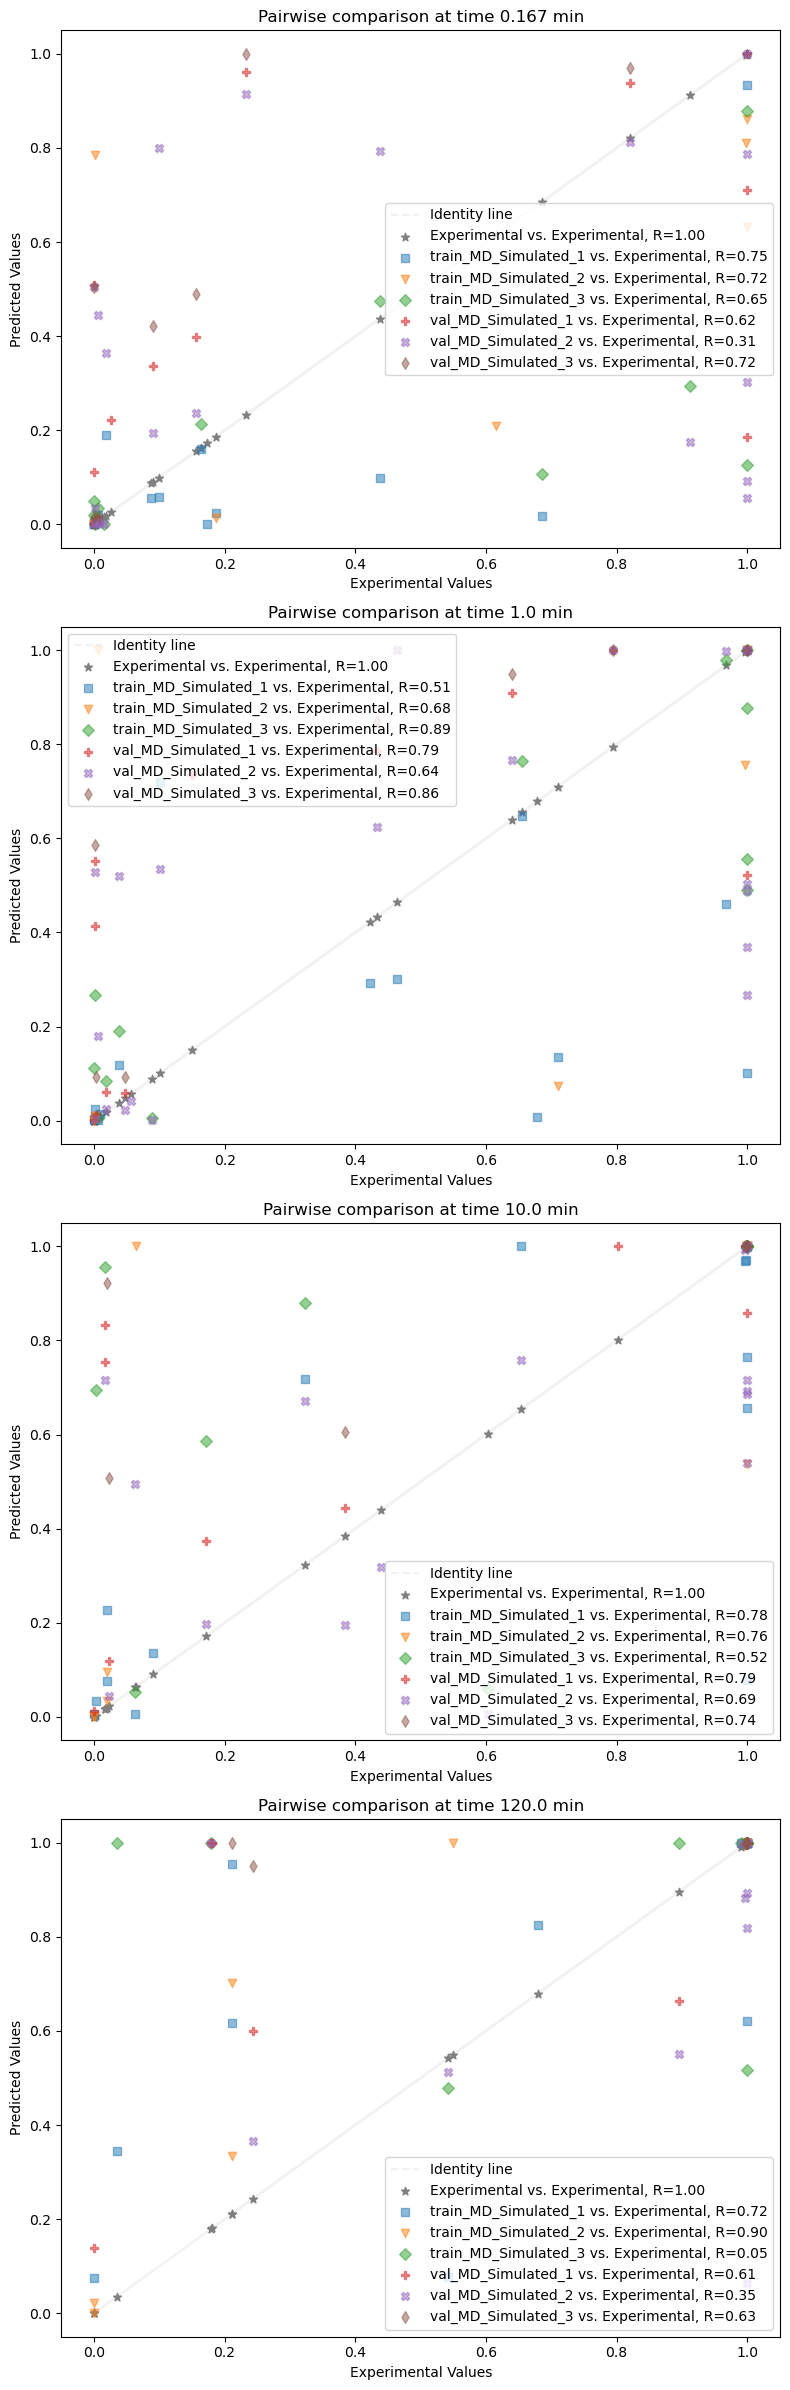

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:345: UserWarning: Unknown element D found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


plotting R agreement
plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide           calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0        Experimental   
1    0.090390  0.432930  0.996560  1.000000        1        Experimental   
2    0.026650  0.149330  0.801570  1.000000        2        Experimental   
3    0.186800  0.710100  1.000000  1.000000        3        Experimental   
4    0.998800  1.000000  1.000000  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
116  0.970142  1.000000  1.000000  1.000000        5  val_MD_Simulated_3   
117  0.999999  1.000000  1.000000  1.000000        6  val_MD_Simulated_3   
118  0.016761  0.093696  0.508255  0.950111       14  val_MD_Simulated_3   
119  0.504248  0.584974  0.922370  1.000000       32  val_MD_Simulated_3   
120  0.016111  0.092339  0.605057  0.999845       35  val_MD_Simulated_3   

     ResStr  ResEnd            

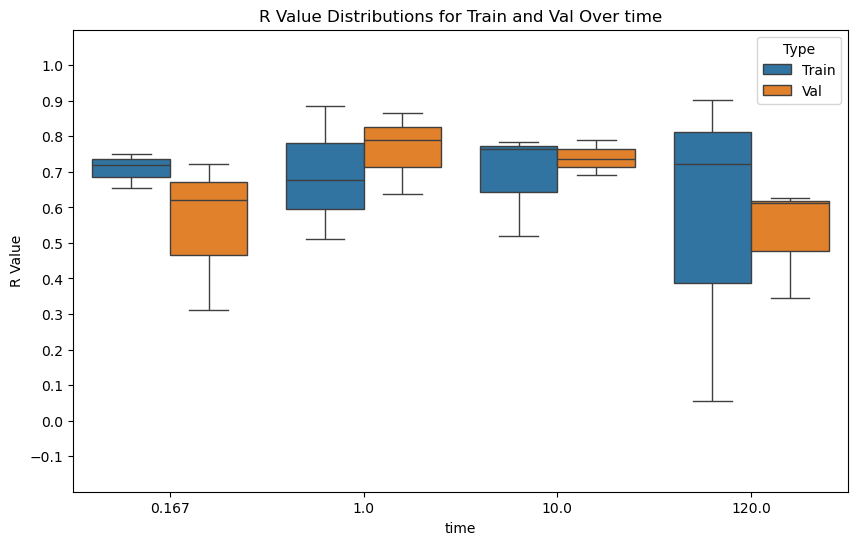

concat plot_df
nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.023830  0.134480  0.764080  1.000000        3  train_MD_Simulated_1   
1    0.000590  0.003530  0.034720  0.345580       10  train_MD_Simulated_1   
2    0.000110  0.000660  0.006560  0.075900       11  train_MD_Simulated_1   
3    0.097770  0.459950  0.997890  1.000000       16  train_MD_Simulated_1   
4    0.056310  0.293210  0.968890  1.000000       17  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
155  0.970142  1.000000  1.000000  1.000000        5    val_MD_Simulated_3   
156  0.999999  1.000000  1.000000  1.000000        6    val_MD_Simulated_3   
157  0.016761  0.093696  0.508255  0.950111       14    val_MD_Simulated_3   
158  0.504248  0.584974  0.922370  1.000000       32    val_MD_Simulated_3   
159  0.016111  0.092339  0.605057  0.999845       35    val_MD_Simulated_3   

     ResStr  ResEnd                      

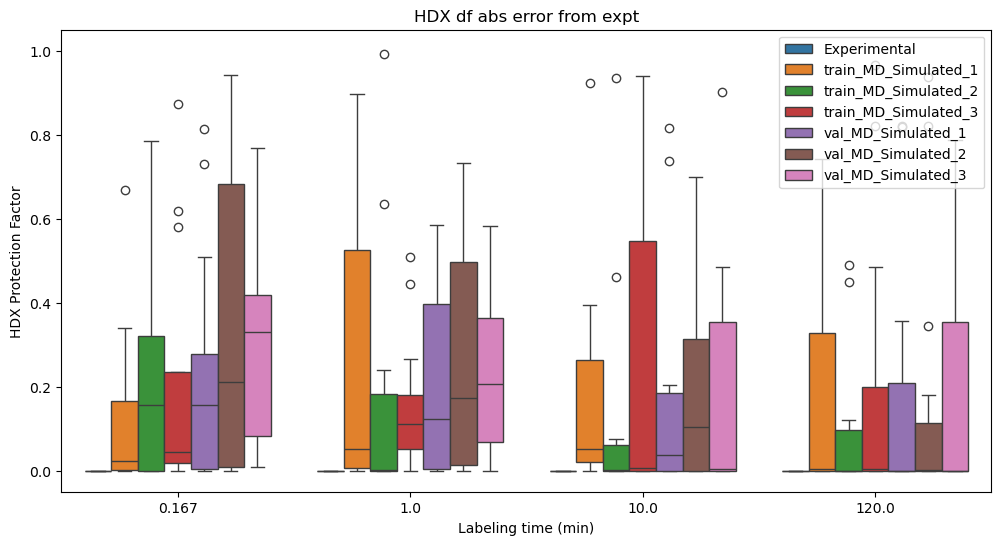

plotting MSE for nan_df
plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.02383  0.13448  0.76408  1.00000        3  train_MD_Simulated_1   
1    0.00059  0.00353  0.03472  0.34558       10  train_MD_Simulated_1   
2    0.00011  0.00066  0.00656  0.07590       11  train_MD_Simulated_1   
3    0.09777  0.45995  0.99789  1.00000       16  train_MD_Simulated_1   
4    0.05631  0.29321  0.96889  1.00000       17  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
196  0.00963  0.05627  0.43963  0.99904       36          Experimental   
197  0.01757  0.10068  0.65396  1.00000       37          Experimental   
198  0.09888  0.46390  0.99804  1.00000       38          Experimental   
199  0.00650  0.03831  0.32339  0.99079       39          Experimental   
200  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       N

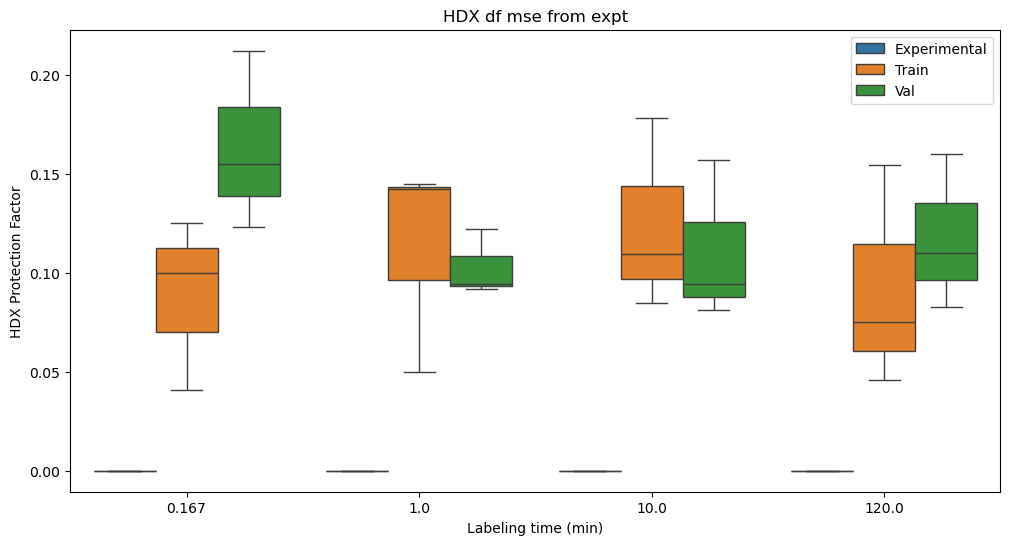

Saving experiment to:  logs/spaceK_SR_BPTITtut14_1708887699.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [6]:
def run_split_test_BPTI(split_mode, name, system):


    
    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode, system])

    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path


splits = ['r', 's', 'R3', 'xR', 'Sp', 'SR']
split_names = ['naiverandom', 'NC_Termini', 'RedundantK', 'XtureK', 'pINspace', 'spaceK']
system = 'BPTITtut'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []

# initialise c profile
pr = cProfile.Profile()
pr.enable()


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test_BPTI(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)

# end c profile
pr.disable()
# create stats object
ps = pstats.Stats(pr)
# sort stats by cumulative time
ps.sort_stats('cumulative')


In [7]:
ps.print_stats()


         62873005 function calls (61606135 primitive calls) in 114.677 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000  114.687   57.344 /home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3472(run_code)
     14/2    0.000    0.000  114.687   57.344 {built-in method builtins.exec}
        1    0.000    0.000  114.687  114.687 /tmp/ipykernel_788353/476406561.py:38(<module>)
        6    0.000    0.000  114.684   19.114 /tmp/ipykernel_788353/476406561.py:1(run_split_test_BPTI)
        6    0.002    0.000  109.022   18.170 /home/alexi/Documents/ValDX/ValDX/ValidationDX.py:601(run_VDX)
       88    0.002    0.000   68.460    0.778 /home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/subprocess.py:452(run)
       88    0.001    0.000   67.804    0.771 /home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/subprocess.py:984(communicate)
       18    0.001    0.

In [8]:
# def run_split_test_BPTI(split_mode, name, system):

    
#     # settings.split_mode = 'R'
#     settings.split_mode = split_mode
#     settings.name = "_".join([name, split_mode, system])

#     VDX = ValDXer(settings)

#     VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
#     VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

#     VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

#     run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
#     analysis_dump, df, name = VDX.dump_analysis()
#     save_path = VDX.save_experiment()

#     return run_outputs, analysis_dump, df, name, save_path


# splits = ['r', 's', 'R3', 'xR', 'Sp', 'SR']
# split_names = ['naiverandom', 'NC_Termini', 'RedundantK', 'XtureK', 'pINspace', 'spaceK']
# system = 'BPTITtut'

# raw_run_outputs = {}
# analysis_dumps = {}
# analysis_df = pd.DataFrame()
# names = []
# save_paths = []




# for split, split_name in zip(splits, split_names):
#     run_outputs, analysis_dump, df, name, save_path = run_split_test_BPTI(split, split_name, system)
#     raw_run_outputs[name] = run_outputs
#     analysis_dumps.update(analysis_dump)
#     analysis_df = pd.concat([analysis_df, df])
#     names.append(name)
#     save_paths.append(save_path)



/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


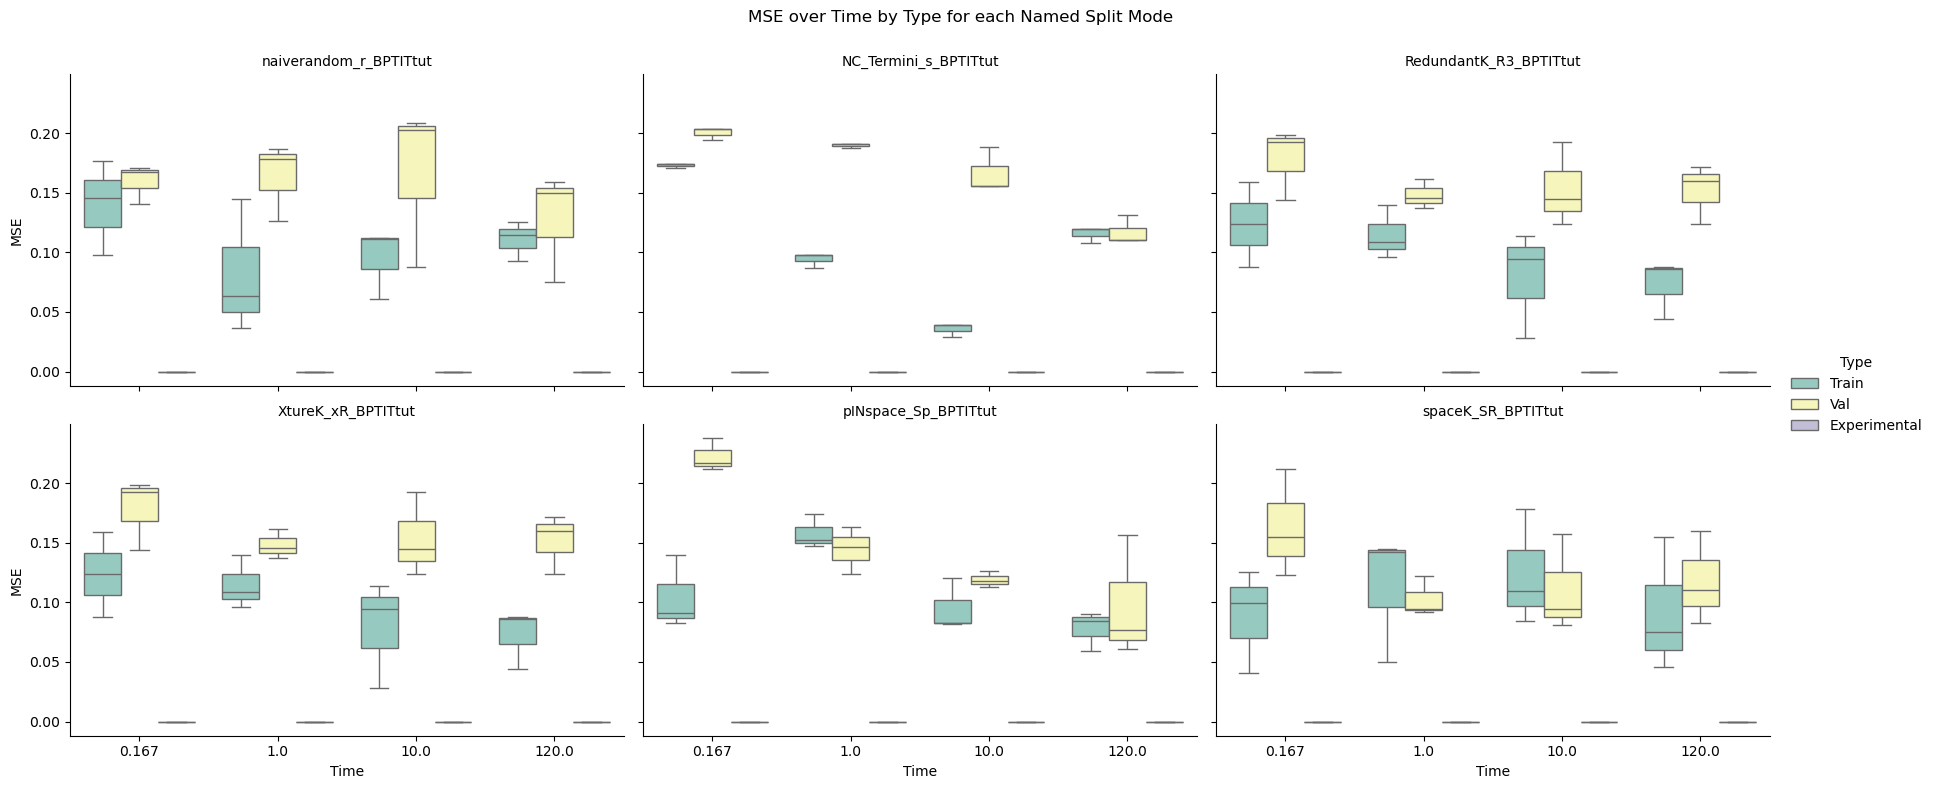

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


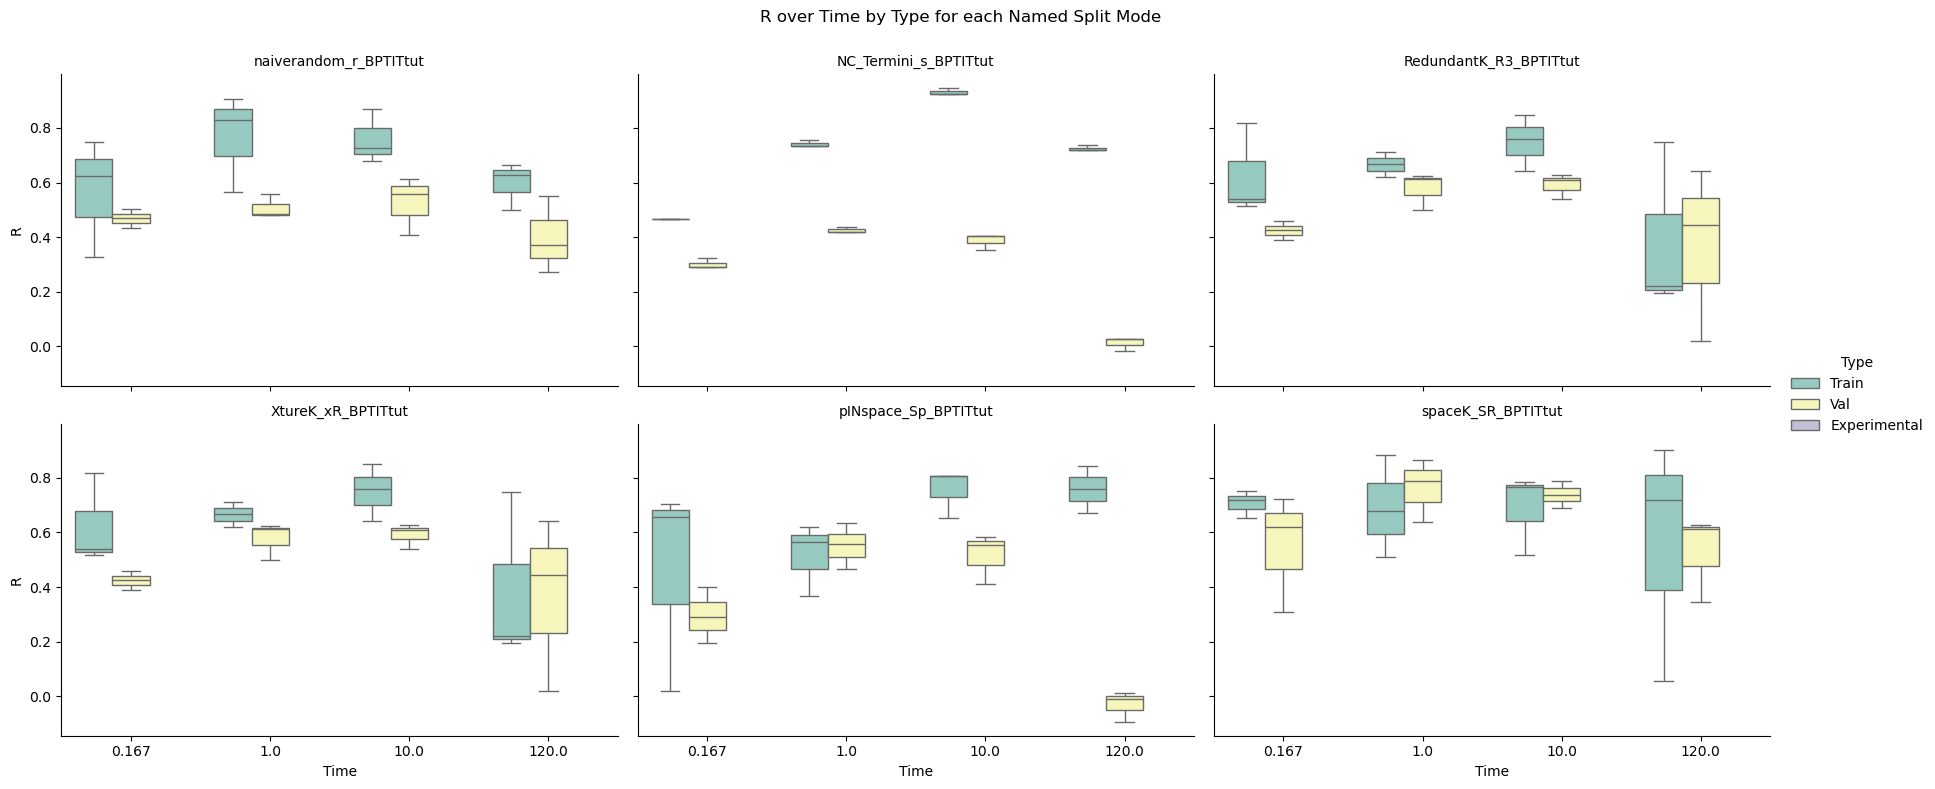

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                                LogPf  \
0   [5.549539547084498, 6.936924433855622, 4.43963...   
1   [7.0, 8.75, 8.75, 7.0, 7.35, 5.6, 5.9499999999...   
2   [6.936924433855622, 6.936924433855622, 5.54953...   
3   [5.549539547084498, 6.936924433855622, 6.93692...   
4   [5.215937374971174, 5.67466912998046, 3.187517...   
..                                                ...   
7   [6.172118407285612, 7.715148009107015, 7.71514...   
8   [4.277777573262381, 4.54513867159128, 3.208333...   
9   [7.0, 8.75, 8.75, 7.0, 7.35, 5.6, 5.9499999999...   
10  [5.347221966577976, 6.68402745822247, 6.684027...   
11  [5.347221966577976, 6.68402745822247, 6.684027...   

                   calc_name  \
0       train_MD_Simulated_1   
1   no_weight_MD_Simulated_1   
2         val_MD_Simulated_1   
3        test_MD_Simulated_1   
4       train_MD_Simulated_2   
..                       ...   
7        test_MD_Simulated_2   
8       train_MD_Simulated_3   
9   no_weight_MD_Simulated_

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

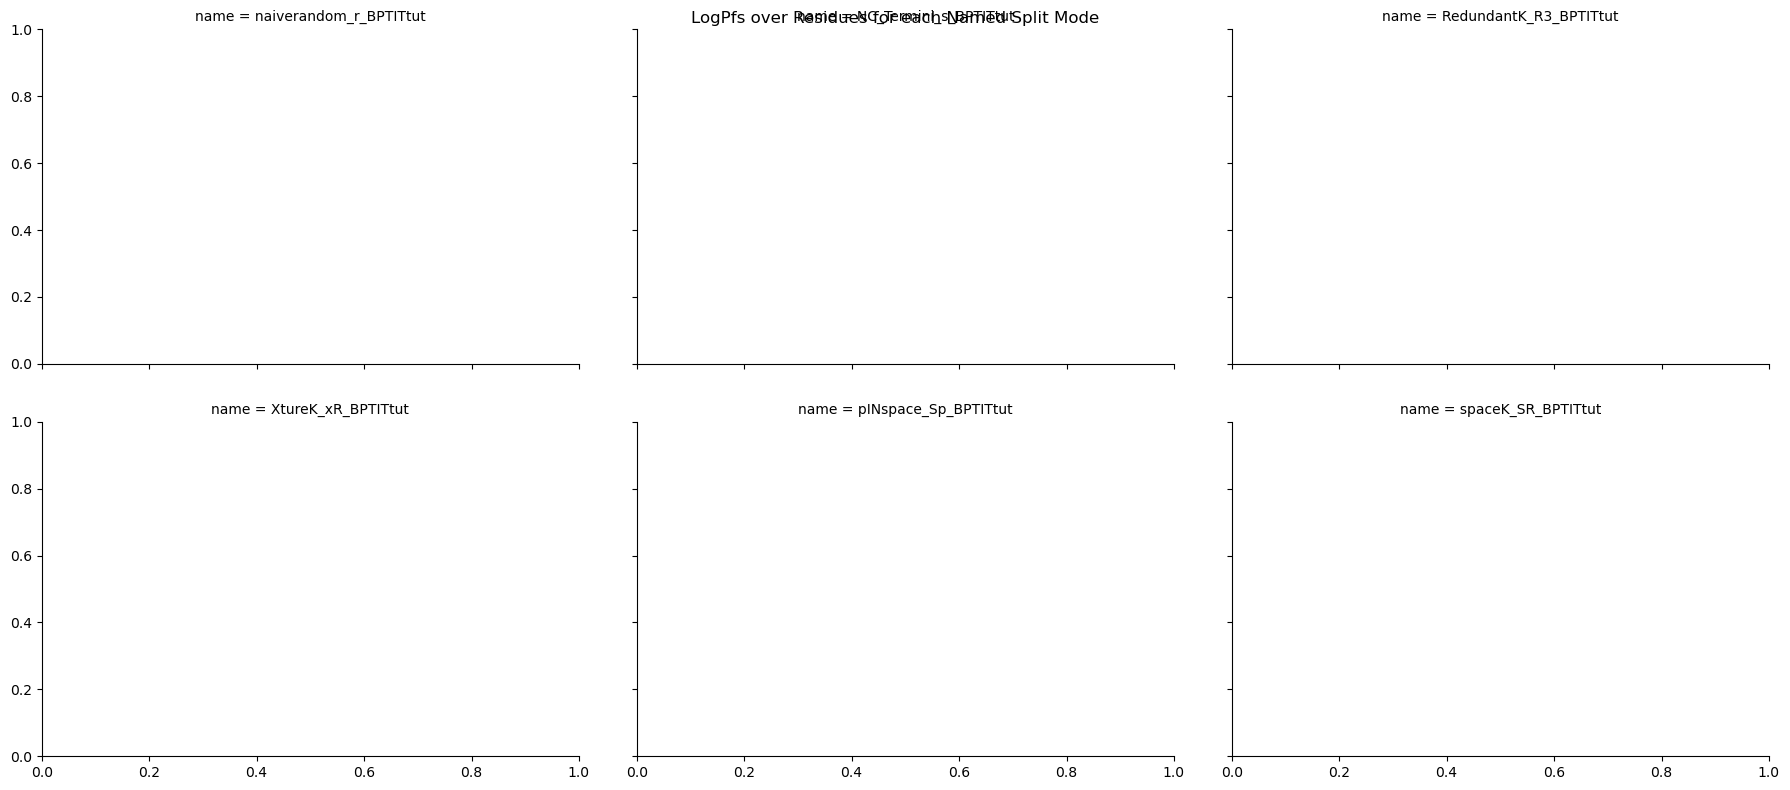

In [11]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# plot BV distributions 
# print(analysis_dumps["AvsB_S"]["BV_constants"])

BV_constants = pd.concat([analysis_dumps[i]["BV_constants"] for i in names])
num_names = len(BV_constants)/len(names)
BV_constants["name"] = [i for i in names for j in range(int(num_names))]
print(BV_constants)

# Create a FacetGrid, using 'name' for each subplot - plot as scatter plot
g = sns.FacetGrid(BV_constants, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('BV Constants over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.scatterplot, "Bc", "Bh", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "BV")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# plot BV distributions 
bc, bh = 0.35, 2

BV_constants = pd.concat([analysis_dumps[i]["BV_constants"] for i in names])
num_names = len(BV_constants)/len(names)
BV_constants["name"] = [i for i in names for j in range(int(num_names))]
print(BV_constants)

# Create a FacetGrid with a single axis
g = sns.FacetGrid(BV_constants, height=4, aspect=1.5)
g.fig.suptitle('BV Constants over Residues for each Named Split Mode')

# Create scatter plot
g = g.map(sns.scatterplot, "Bc", "Bh", "name", palette="Set2", alpha=0.5)

# Adding dashed lines at bc and bh
plt.axhline(bh, color='grey', linestyle='dashed')
plt.axvline(bc, color='grey', linestyle='dashed')

# Adding some additional options for better visualization
g.add_legend(title='name')
g.set_axis_labels("Bc", "Bh")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

